# Analysis of the impact of the increase in the CPI (Consumer Price Index) on the pension received by retirees at the ONP (Pension Standardization Office) in Peru due to COVID-19

### Resumen
El presente documento tiene como objetivo determinar el impacto de la inflación derivada de la crisis del COVID-19 en los beneficiarios jubilados de la ONP, centrándose en cómo, cuánto y dónde afectó principalmente.

Se examina la data histórica del Índice de Precios al Consumidor (IPC) para comprender la situación previa a la pandemia. Posteriormente, se analiza la variación del IPC durante y después de la pandemia, abarcando el periodo entre 2020 y 2022. Se emplea una proyección basada en la data histórica y se utilizan algoritmos de machine learning para estimar con mayor precisión los valores de inflación generados por la crisis económica del COVID-19.

Una vez establecidos estos valores, se profundiza en el análisis para determinar qué departamentos y segmentos de los beneficiarios de la ONP se vieron más afectados en términos de capacidad adquisitiva de sus pagos por jubilación. Este estudio busca proporcionar una comprensión integral del impacto de la inflación en los pensionistas de la ONP, identificando áreas geográficas y grupos específicos que experimentaron mayores desafíos económicos durante la crisis.


### Indice

- Introduccion
- Parte 1: Análisis del IPC Lima Metropolitana BCRP
    - Valores historicos IPC Lima Metropolitana 2000-2023
    - Valores historicos IPC Lima Metropolitana 2020-2023
    - Variacion mensual del IPC de Lima Metropolitana 2020-2023
    - Variacion anual del IPC de Lima Metropolitana 2020-2023
- Parte 2: Análisis del IPC por departamento SIRTOD
    - Variacion del IPC por Departamento 2021-2022
    - Inflacion anual por departamento 2013-2022
    - Inflacion producto de la pandemia por departamento 2021-2022
- Parte 3: Análisis de los beneficiarios en el 4° trimestre 2022 de la Oficina de Normalización Previsional - ONP
    - Volumen de pensiones entregadas por departamento
    - Volumen de pensiones entregadas por departamento (No Lima)
    - Numero de beneficiarios por departamento (No Lima)
    - Pensiones promedio por departamento (No Lima)
    - Distribución del Monto de Pensiones por Departamento
        - Analisis de pensiones - Valores típico
        - Analisis de pensiones - Valores atípico
    - Depreciacion de pensiones por departamento (No Lima) 2021-2022
    - Rango de edad de jubilados por rango de pension
    - Rango de edad de jubilados por estado civil
    
- Referencias

### Introducción:

La inflación, un fenómeno económico intrínseco a las dinámicas de cualquier nación, ha sido objeto de constante escrutinio y análisis en el contexto peruano durante la última década. Durante este periodo, el país ha experimentado niveles de inflación mayormente alineados con las estimaciones proporcionadas por el Banco Central de Reserva del Perú (BCRP). Sin embargo, el año 2020 marcó un hito crucial en esta narrativa, al verse la economía peruana profundamente afectada por la pandemia de COVID-19. Las restricciones impuestas para contener la propagación del virus interrumpieron las actividades económicas y las cadenas logísticas, sumiendo a las empresas en dificultades económicas, incluso enfrentando el riesgo inminente de quiebra.

En respuesta a este desafío sin precedentes, el BCRP, en colaboración con el gobierno, implementó medidas destinadas a proteger a las empresas y estimular la economía. Estas estrategias incluyeron la inyección de liquidez a través de préstamos, una acción necesaria pero no exenta de consecuencias. El incremento en la oferta monetaria derivado de estas medidas también generó un impacto en la tasa de inflación, manifestándose en los reportes trimestrales de los años 2021 y 2022. En un esfuerzo por contrarrestar esta tendencia, el BCRP adoptó medidas adicionales, como el aumento de la tasa de referencia del banco central.

Este contexto inflacionario, aunque indispensable para la estabilidad económica a corto plazo, ha suscitado preocupaciones significativas, especialmente en sectores vulnerables de la población. Entre los afectados, destacan los jubilados cuyas pensiones no se han ajustado en consonancia con el crecimiento de la inflación.

In [32]:
import os
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
pd.set_option('display.float_format', '{:.2f}'.format)


In [33]:
directorio_trabajo = 'F:\OneDrive - Universidad Católica de Santa María\Proyectos\Inflacion SNP'
os.chdir(directorio_trabajo)


### Parte 1: Análisis del IPC Lima Metropolitana BCRP

#### Valores historicos IPC Lima Metropolitana 2000-2023

El gráfico que se presenta a continuación ilustra la evolución del Índice de Precios al Consumidor (IPC) en Lima Metropolitana desde el año 2000 hasta 2023. Lima Metropolitana, como epicentro demográfico de Perú con aproximadamente 11 millones de habitantes, desempeña un papel crucial en el análisis de las tendencias económicas del país.

Se observa que, durante el periodo analizado, el crecimiento del IPC en Lima Metropolitana exhibió una trayectoria caracterizada por fluctuaciones significativas. Desde el año 2000 hasta el 2010, se registró un crecimiento lento con algunos picos notables. Sin embargo, a partir del 2010, se observó una fase de crecimiento más moderado y estable hasta 2020.

La llegada de la pandemia de COVID-19 en marzo de 2020 marcó un punto de inflexión en la dinámica del IPC. Con la implementación del toque de queda y la consecuente paralización de actividades económicas, el Estado y el Banco Central de Reserva del Perú (BCRP) implementaron medidas de emergencia, como el programa Reactiva Perú y la reducción significativa de las tasas de interés referencial. Estas acciones buscaban proteger a las empresas, facilitando el acceso a créditos a tasas favorables y evitando quiebras masivas.

Durante la etapa inicial de la pandemia, reflejada en el gráfico, el IPC se mantuvo con un crecimiento relativamente normal. Sin embargo, a partir de junio de 2021, se observa un cambio drástico en la tendencia, con un crecimiento acelerado del IPC. Este aumento significativo llevó a que la inflación saliera del rango meta establecido por el BCRP, que oscila entre el 2.5% y el 3%.

Para proporcionar un contexto adicional, el gráfico también incluye una proyección del crecimiento del IPC basada en el comportamiento observado desde 2010 hasta 2020. Esta proyección sirve como referencia para simular cómo hubiera sido el crecimiento del IPC en ausencia de los eventos extraordinarios asociados a la pandemia.

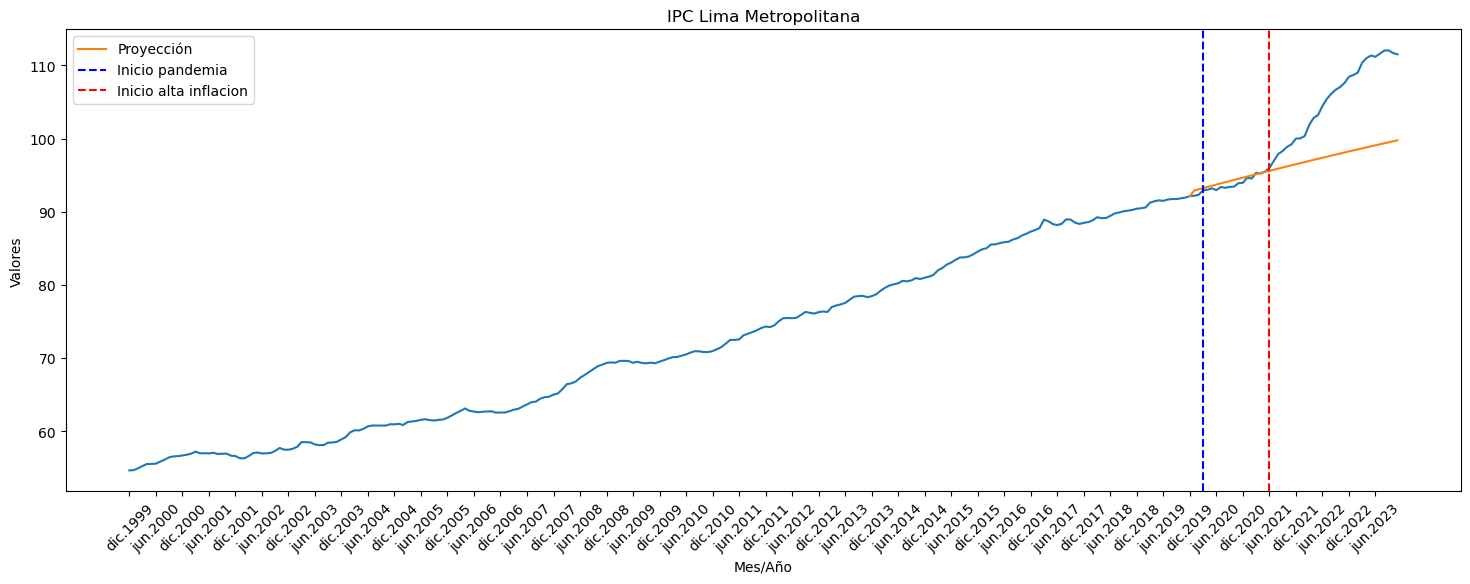

In [34]:
url_bcrp = "https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PN38705PM/json/1999-12/2023-11"
req_bcrp = requests.get(url_bcrp)
req_bcrp.status_code
if req_bcrp.status_code == 200:
    json_bcrp = json.loads(req_bcrp.text)
    df_bcrp = pd.DataFrame(json_bcrp["periods"])
    df_bcrp["values"] = df_bcrp["values"].apply(lambda x: round(float(x[0]),2))
    df_bcrp["name"] = df_bcrp["name"].apply(lambda str: str.lower())
    df_bcrp["variacion"]=df_bcrp["values"].diff()
    df_bcrp.to_csv("df_bcrp.csv", index=False)
    #print(df_bcrp)
else:
    print("error response")

df_bcrp = pd.read_csv("df_bcrp.csv")
df_bcrp_train = df_bcrp.iloc[df_bcrp.index[df_bcrp["name"]=="ene.2010"][0]:df_bcrp.index[df_bcrp["name"]=="ene.2020"][0]]
degree = 2  # Grado del polinomio
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(np.arange(len(df_bcrp_train)).reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X_poly, df_bcrp_train['values'], test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
X_extend = poly.fit_transform(np.arange(len(df_bcrp_train), len(df_bcrp_train) + 47).reshape(-1, 1))
y_extend = model.predict(X_extend)
df_projected = pd.DataFrame({'name':df_bcrp[241:]["name"],'values_projected': y_extend})
#df_bcrp = pd.concat([df_bcrp, df_projected], ignore_index=True)
df_bcrp = pd.merge(df_bcrp, df_projected, on='name', how='left')

df_bcrp.loc[df_bcrp["name"]=="dic.2019","values_projected"] = df_bcrp.loc[df_bcrp["name"]=="dic.2019","values"]
plt.figure(figsize=(18, 6))
plt.plot(df_bcrp["name"], df_bcrp["values"], linestyle="-")
plt.plot(df_bcrp['values_projected'], label='Proyección')
# Lineas segmento
plt.axvline(x="mar.2020", color="blue", linestyle="--", label = "Inicio pandemia")
plt.axvline(x="jun.2021", color="red", linestyle="--", label = "Inicio alta inflacion")
#plt.axvline(x="dic.2022", color="red", linestyle="--", label = "Fin alta inflacion")
#
plt.xlabel("Mes/Año")
plt.xticks(df_bcrp['name'][::6], rotation=45)
plt.ylabel("Valores")
plt.title("IPC Lima Metropolitana")
plt.gca().set_aspect('auto')
plt.legend()
plt.show()


#### Valores historicos IPC Lima Metropolitana 2020-2023

El gráfico que se presenta a continuación se centra en el comportamiento del Índice de Precios al Consumidor (IPC) en Lima Metropolitana durante el periodo comprendido entre 2020 y 2023. Este análisis se enfoca en los efectos de las medidas implementadas para mitigar los impactos económicos de la pandemia de COVID-19, así como en los eventos externos que influyeron en la dinámica inflacionaria.

En el segundo trimestre de 2020, el gobierno y el Banco Central de Reserva del Perú (BCRP) aplicaron medidas, como la inyección de liquidez a través de instrumentos incrementando la oferta monetaria, con el objetivo de contrarrestar los efectos negativos de la pandemia sobre la economía. Sin embargo, como se observa en el gráfico, los efectos de estas medidas no se reflejaron inmediatamente en el IPC. Esto se debe a que la diseminación de la liquidez por el sistema financiero requiere tiempo, y los resultados comienzan a manifestarse en la inflación hacia mediados del 2021.

Es importante señalar que durante el primer trimestre de 2022, otro factor externo impactó la dinámica económica: la guerra entre Ucrania y Rusia. Este conflicto provocó sanciones y rupturas en las cadenas de suministro, afectando la oferta de diversos productos, entre ellos el petróleo. El aumento en el precio del petróleo, junto con los incrementos en los costos de transporte y otros factores, contribuyó al aumento de la inflación.

Es relevante destacar que, aunque este documento se enfoca en analizar los factores inflacionarios relacionados con el país, el contexto internacional también juega un papel crucial. El análisis se centrará en comprender cómo la inflación impactó la capacidad adquisitiva de los pensionistas con respecto a sus pensiones, así como identificar los departamentos en el Perú que experimentaron mayores afectaciones.

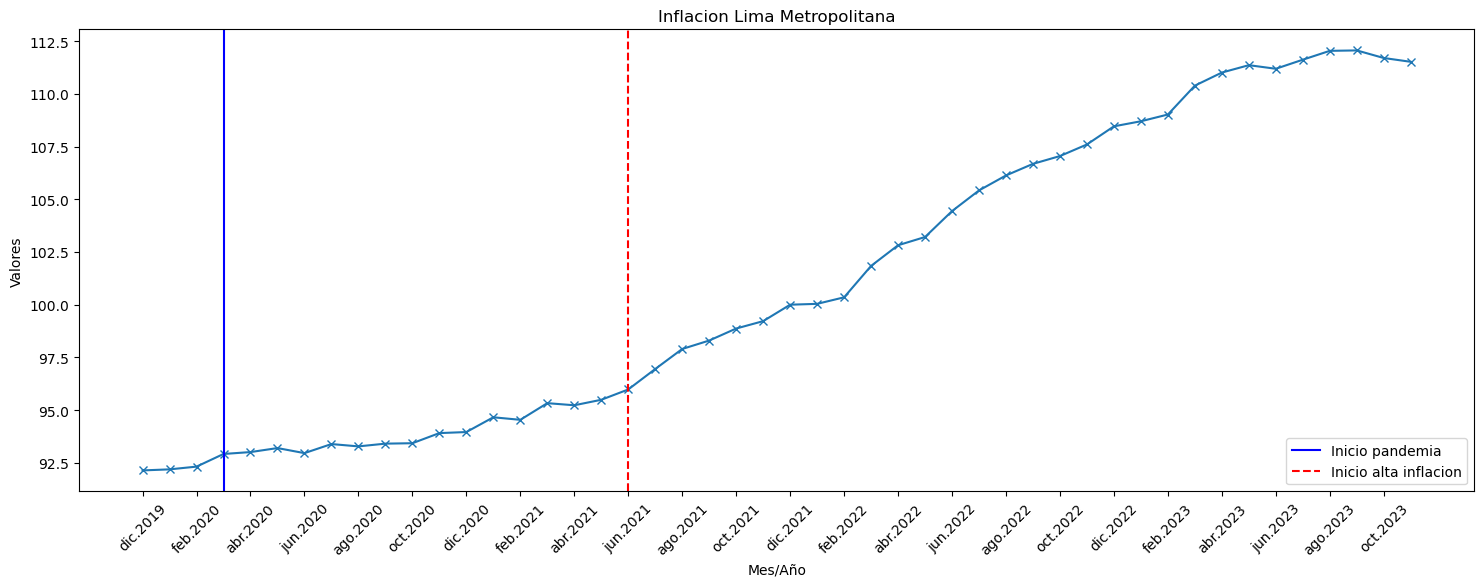

In [35]:
df_bcrp_last = df_bcrp.iloc[df_bcrp.index[df_bcrp["name"]=="dic.2019"][0]:]
plt.figure(figsize=(18, 6))
plt.plot(df_bcrp_last["name"], df_bcrp_last["values"], marker="x", linestyle="-")
# Lineas segmento
plt.axvline(x="mar.2020", color="blue", linestyle="-", label = "Inicio pandemia")
#plt.axvline(x="ene.2022", color="red", linestyle="--", label = "Inicio 2022")
plt.axvline(x="jun.2021", color="red", linestyle="--", label = "Inicio alta inflacion")
#
plt.xticks(df_bcrp_last['name'][::2], rotation=45)
plt.xlabel("Mes/Año")
plt.ylabel("Valores")
plt.title("Inflacion Lima Metropolitana")
plt.gca().set_aspect('auto')
plt.legend()
plt.show()

#### Variacion mensual del IPC de Lima Metropolitana 2020-2023

El siguiente gráfico proporciona una representación visual de la variación absoluta mensual del Índice de Precios al Consumidor (IPC) en Lima Metropolitana durante el periodo crítico de 2020 a 2023, abarcando la pandemia y la guerra en Ucrania. Para establecer parámetros de referencia, se extrajeron la media y el percentil 10-90 de la variación absoluta mensual del IPC desde el año 2000 hasta 2019. Estos valores históricos muestran una variación media mensual del IPC de 0.156 y un rango percentil 10-90 de -0.1 a 0.41.

Al trazar estos valores como límites en el gráfico para el periodo de 2020 a 2023, se evidencia que, desde el año 2021, la variación mensual del IPC estaba consistentemente por encima de la media y el percentil máximo, indicando una tendencia al alza. Sin embargo, es en el año 2022 donde este comportamiento se acentúa, con la mayoría de los valores superando tanto la media como el límite superior del percentil, llegando incluso a rebasar el rango meta establecido por el Banco Central de Reserva del Perú (BCRP).

Ante esta situación, el BCRP respondió elevando la tasa de interés de referencia hasta 7.75%, con el objetivo de restringir el crecimiento inflacionario y devolver los valores dentro del rango meta. Estos efectos correctivos se pueden observar claramente en el gráfico durante el 2023, con los valores regresando a niveles dentro del percentil e incluso situándose por debajo de este, indicando una estabilización en la variación mensual del IPC.

0.15625
[-0.1   0.41]


C:\Users\gonza\AppData\Local\Temp\ipykernel_7588\150466844.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bcrp_last["variacion"]=df_bcrp_last["values"].diff()


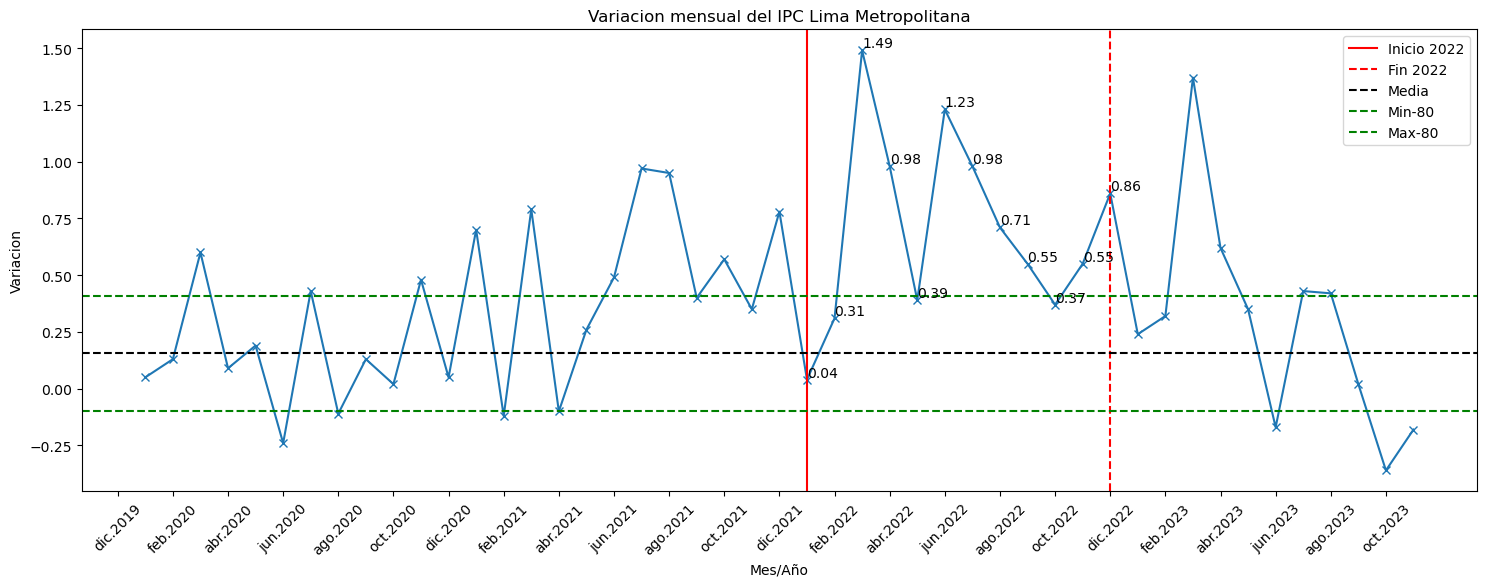

In [36]:
#Media y 90% desviacion
df_bcrp_estable = df_bcrp.iloc[:df_bcrp.index[df_bcrp["name"]=="ene.2020"][0]]
variacion_bcrp = df_bcrp_estable["variacion"].dropna()
media = np.mean(variacion_bcrp)
rango_80 = np.percentile(variacion_bcrp,[10,90])
print(media)
print(rango_80)
df_bcrp_last["variacion"]=df_bcrp_last["values"].diff()
plt.figure(figsize=(18, 6))
plt.plot(df_bcrp_last["name"], df_bcrp_last["variacion"], marker="x", linestyle="-")
# Lineas segmento
plt.axvline(x="ene.2022", color="red", linestyle="-", label = "Inicio 2022")
plt.axvline(x="dic.2022", color="red", linestyle="--", label = "Fin 2022")
plt.axhline(y=media, color="black", linestyle="--", label = "Media")
plt.axhline(y=rango_80[0], color="green", linestyle="--", label = "Min-80")
plt.axhline(y=rango_80[1], color="green", linestyle="--", label = "Max-80")
#
for index, row in df_bcrp_last[df_bcrp_last["name"].str.contains("2022")].iterrows():
    plt.text(row["name"], row["variacion"], f'{row["variacion"]:.2f}', ha='left', va='bottom')
#
plt.xticks(df_bcrp_last['name'][::2], rotation=45)
plt.xlabel("Mes/Año")
plt.ylabel("Variacion")
plt.title("Variacion mensual del IPC Lima Metropolitana")
plt.gca().set_aspect('auto')
plt.legend()
plt.show()

#### Variacion anual del IPC de Lima Metropolitana 2020-2023

El gráfico de barras presenta la acumulación de las variaciones mensuales del Índice de Precios al Consumidor (IPC) en Lima Metropolitana durante el periodo 2020-2023. Se destaca que los años 2021 y 2022 exhibieron incrementos acumulados notables de 6.04 y 8.46, respectivamente. Estos valores contrastan significativamente con el año 2020, ya que la variación acumulada anual del IPC en Lima Metropolitana suele oscilar en el rango de 1.5 a 2.5.

La disparidad observada en los años 2021 y 2022 subraya que estos dos periodos fueron especialmente impactantes en el aumento del Índice de Precios al Consumidor desde el año 2010. Esta información resalta la magnitud del impacto económico durante estos años y proporciona una base sólida para adentrarse con mayor detalle en el análisis de cómo el incremento acelerado del IPC afectó a diferentes departamentos del Perú.

C:\Users\gonza\AppData\Local\Temp\ipykernel_7588\2804392157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bcrp_last[["month","year"]] = df_bcrp_last["name"].str.split(".", expand=True)
C:\Users\gonza\AppData\Local\Temp\ipykernel_7588\2804392157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bcrp_last[["month","year"]] = df_bcrp_last["name"].str.split(".", expand=True)


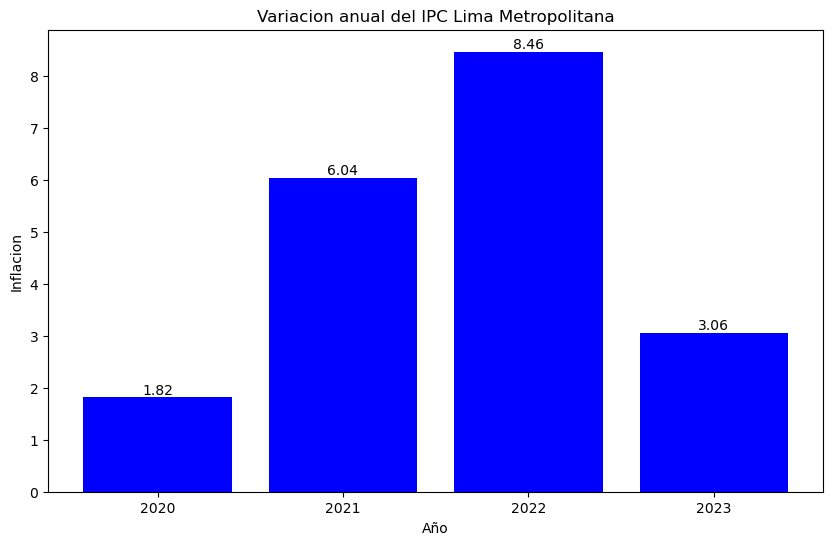

In [37]:
df_bcrp_last[["month","year"]] = df_bcrp_last["name"].str.split(".", expand=True)
df_bcrp_last_year = df_bcrp_last.groupby("year")["variacion"].sum().reset_index()[1:]
df_bcrp_last_year['year'] = df_bcrp_last_year['year'].astype(int)
plt.figure(figsize=(10, 6))
bars = plt.bar(df_bcrp_last_year['year'], df_bcrp_last_year['variacion'], color='blue')
plt.xlabel('Año')
plt.ylabel('Inflacion')
plt.title('Variacion anual del IPC Lima Metropolitana')
plt.xticks(df_bcrp_last_year['year'])
#plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()


### Parte 2: Análisis del IPC por departamento SIRTOD

#### Variacion del IPC por Departamento 2021-2022

La investigación se adentra en la evolución del Índice de Precios al Consumidor (IPC) en cada departamento del Perú, utilizando datos obtenidos del Sistema de Información Regional para la Toma de Decisiones (SIRTOD) del Instituto Nacional de Estadística e Informática (INEI). La información detallada del IPC para cada departamento se descargó en formato Excel, permitiendo un análisis minucioso.

Para comprender la magnitud del impacto de la pandemia en los diferentes departamentos, se generaron dos escenarios. El primero refleja los valores reales del IPC desde 2021 hasta 2022, mientras que el segundo es una proyección basada en la data del IPC desde 2010 hasta 2021, un periodo en el cual el comportamiento del IPC estaba dentro del rango esperado. Esta proyección con data antes de la pandemia permite estimar un escenario con un crecimiento del IPC más lento, sirviendo como referencia para evaluar el impacto de la crisis económica derivada del COVID-19.

La tabla presentada muestra la diferencia entre los valores reales del IPC y los proyectados sin la pandemia, calculando así el crecimiento anómalo posiblemente atribuible a la crisis económica. Se observa que, durante los primeros meses, la diferencia era menor e incluso negativa, pero con el transcurrir del tiempo, esta variación se incrementó significativamente entre ambos escenarios.

Destacadamente, se identifica que el aumento del IPC debido a la pandemia afectó a algunos departamentos de manera más pronunciada que a otros. Los departamentos más destacados en este análisis son Ancash, Pasco, Madre de Dios, Moquegua y Amazonas. Estos resultados ofrecen una visión detallada de cómo la crisis económica provocada por el COVID-19 impactó de manera diferenciada en los distintos departamentos del Perú, proporcionando información clave para comprender las disparidades regionales y sus efectos.

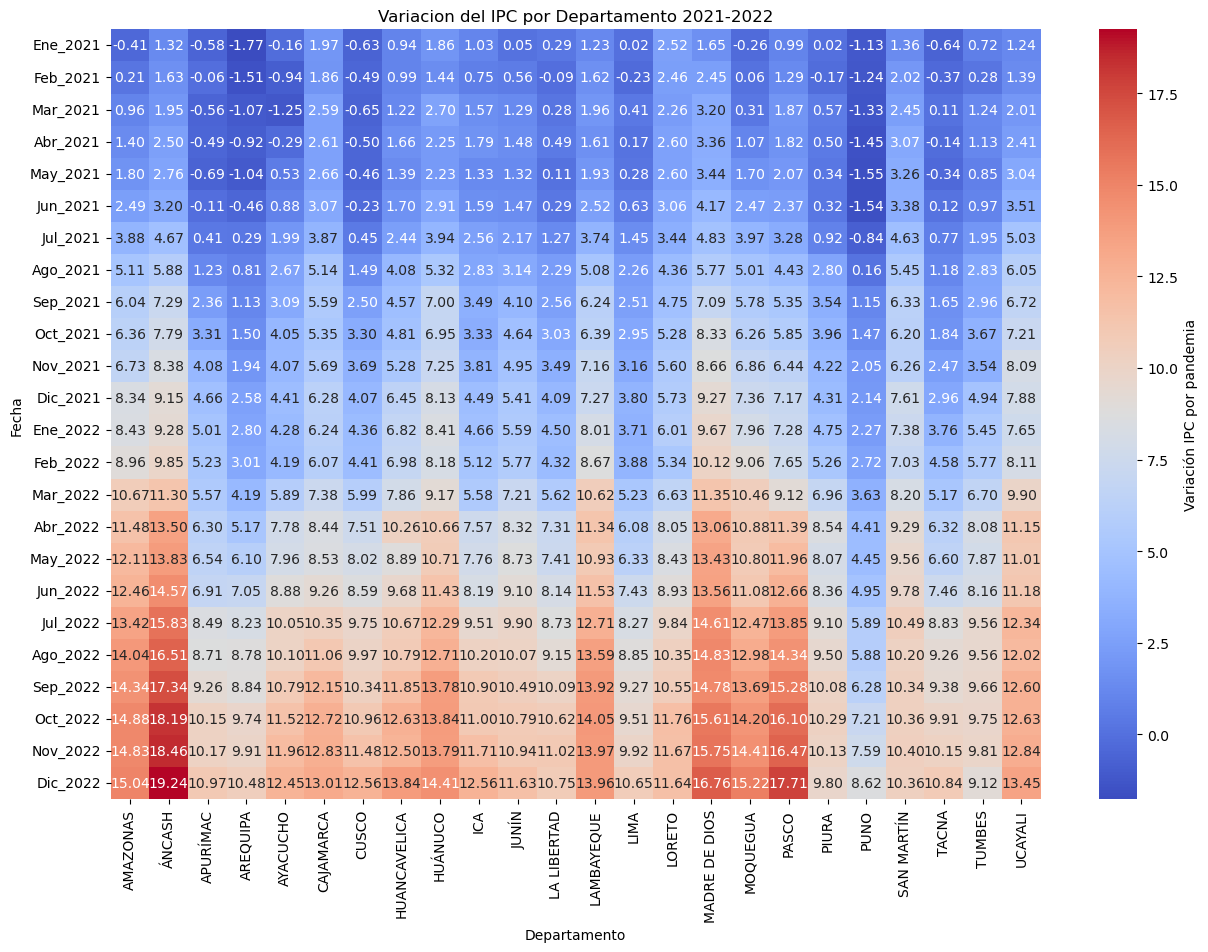

In [38]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_ipc_dep = pd.read_excel("BD\BD_IPC\BD_IPC.xlsx","BD")
df_ipc_dep = df_ipc_dep.round(decimals=2)
"""
#df_ipc_dep.set_index("Departamento", inplace=True)
#df_ipc_dep = df_ipc_dep.iloc[:10,-10:]
#df_ipc_dep
#df_ipc_dep = df_ipc_dep.pivot(index=None, columns="Departamento", values=df_ipc_dep.columns[:])
"""
df_ipc_dep = df_ipc_dep.pivot_table(index=None, columns="Departamento", values=df_ipc_dep.columns[:], sort=False)
df_ipc_dep.index.name = "Date"

df_icp_dep_pandemia = df_ipc_dep.loc["Ene_2021":"Dic_2022","AMAZONAS":]
df_icp_dep_pandemia
df_ipc_dep_train = df_ipc_dep.loc["Ene_2010":"Ene_2021","AMAZONAS":]
departamentos = df_ipc_dep_train.columns[:]
df_ipc_predict = {}
for dep in departamentos:
    df_temp = df_ipc_dep_train[[dep]].copy()
    degree = 2
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(np.arange(len(df_temp)).reshape(-1, 1))
    X_train, X_test, y_train, y_test = train_test_split(X_poly, df_temp[dep], test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    X_extend = poly.fit_transform(np.arange(len(df_temp), len(df_temp) + 24).reshape(-1, 1))
    y_extend = model.predict(X_extend)
    df_ipc_predict[dep] = y_extend

df_ipc_predict = pd.DataFrame(df_ipc_predict).round(decimals=2)
lst_index_pred = list(df_ipc_dep.index)
lst_index_pred = lst_index_pred[lst_index_pred.index("Ene_2021"):lst_index_pred.index("Ene_2023")]
df_ipc_predict["Date"] = lst_index_pred
df_ipc_predict = df_ipc_predict.set_index('Date')
df_ipc_predict

var_pandemia = df_icp_dep_pandemia - df_ipc_predict
plt.figure(figsize=(15, 10))
sns.heatmap(var_pandemia.dropna(), annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Variación IPC por pandemia'})
plt.title('Variacion del IPC por Departamento 2021-2022')
plt.xlabel('Departamento')
plt.ylabel('Fecha')
plt.show()

#### Inflación anual por departamento 2013-2022

En esta etapa de la investigación, se procederá a calcular la inflación anual mediante la consideración de los valores del Índice de Precios al Consumidor (IPC) correspondientes al mes de diciembre de cada año, abarcando el periodo desde 2013 hasta 2022. La inflación anual se define como la variación porcentual del índice en un periodo específico con respecto al año anterior.

Para llevar a cabo este cálculo, se empleará la fórmula proporcionada en la imagen adjunta, que nos permitirá obtener la tasa de inflación anual. Esta fórmula es fundamental para cuantificar y entender el cambio porcentual en el índice de precios, lo cual es esencial para evaluar la evolución de la inflación a lo largo de los años seleccionados.

$$Tasa\ de\ inflación = \left( \frac{{IPC_{año\ 1} - IPC_{año\ 0}}}{{IPC_{año\ 0}}} \right) \times 100\%$$

<img src="BD/Formula_inflacion.jpg">


El análisis de la inflación se apoya en el siguiente gráfico de calor, el cual destaca visualmente la evolución de los valores inflacionarios hasta el año 2022 y revela patrones significativos. Hasta el año 2020, los valores se mantuvieron en niveles considerados normales y generalmente dentro del rango objetivo establecido por el Banco Central de Reserva del Perú (BCRP). No obstante, a partir de los años 2021 y 2022, se observa un marcado aumento en la inflación, evidenciando una tendencia a la alza.

En particular, se destaca que en algunos departamentos, como Amazonas, Ancash, Ica, Lambayeque, Madre de Dios, Moquegua y Pasco, la inflación alcanzó cifras de dos dígitos, marcando un fenómeno significativo y fuera de lo común. Este considerable aumento en la inflación indica un impacto económico considerable en estas regiones durante esos años.

Adicionalmente, se observa que el impacto de este incremento inflacionario varió en magnitud y velocidad en diferentes departamentos; algunos experimentaron un impacto menor o un crecimiento más gradual. Este patrón heterogéneo sugiere que la crisis económica, potencialmente relacionada con la pandemia u otros factores, afectó a las regiones de manera diferenciada.

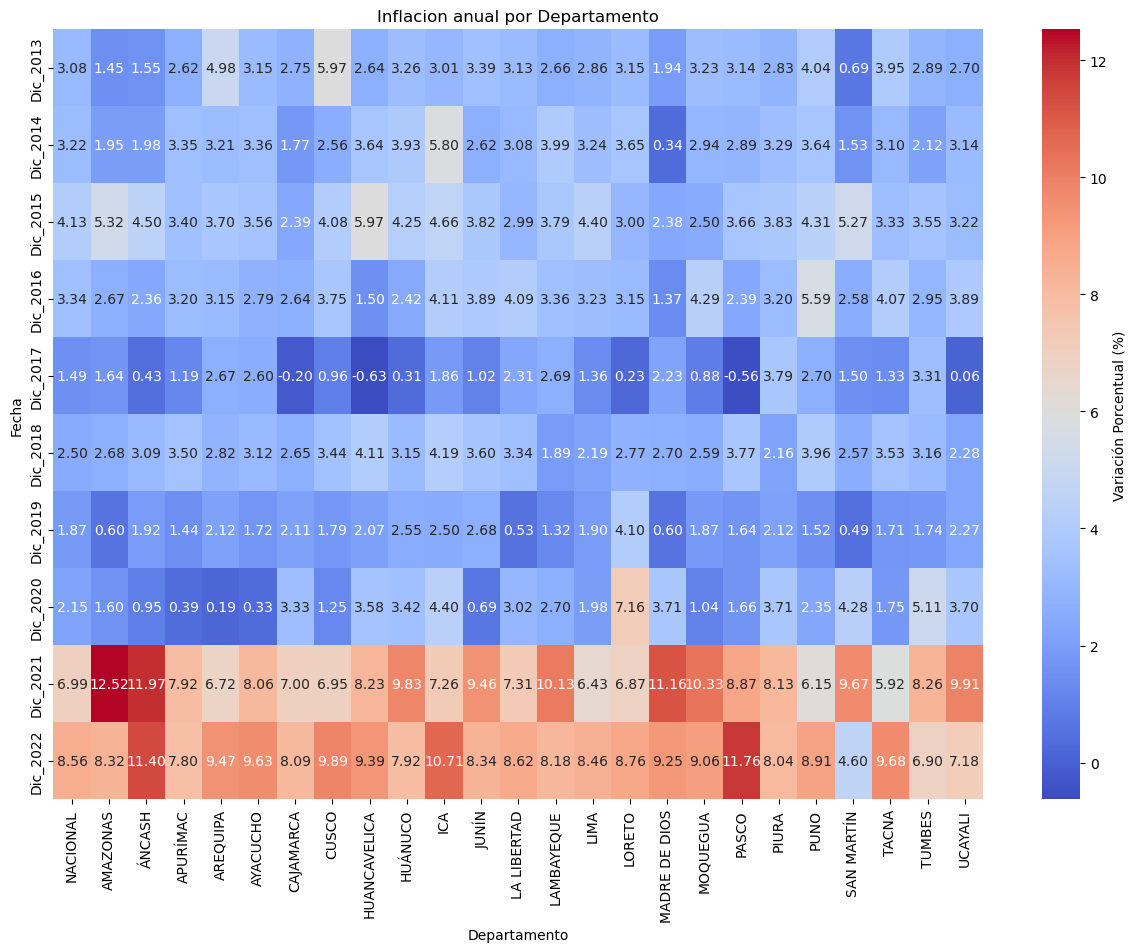

In [39]:
#Porque Puno tuvo un menor crecimiento del IPC, posible resistencia al incremento de precios por causas demograficas o informalidad?
df_ipc_dep = df_ipc_dep[df_ipc_dep.index.astype(str).str.contains('Dic')]
df_ipc_dep.loc["Dic_2012":,:]
df_infla_dep = df_ipc_dep.pct_change()*100
df_infla_dep.loc["Dic_2012":,:].round(decimals=2)
plt.figure(figsize=(15, 10))
sns.heatmap(df_infla_dep.dropna(), annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Variación Porcentual (%)'})
plt.title('Inflacion anual por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Fecha')
plt.show()

#### Inflacion producto de la pandemia por departamento 2021-2022

Considerando la disponibilidad de los datos del Índice de Precios al Consumidor (IPC) desde 2010 hasta 2023 y la estimación de los valores del IPC bajo un comportamiento normal en un escenario sin la pandemia, se procede al cálculo de la inflación, utilizando como año base el 2020. La metodología empleada implica la aplicación de la fórmula previamente presentada para obtener la inflación acumulada durante los años 2021 y 2022 en ambos escenarios. Posteriormente, se determina la diferencia entre estos escenarios, permitiendo una aproximación a la inflación generada por la crisis económica de la pandemia.

Este enfoque busca depurar los valores de la inflación real de los años 2021 y 2022, eliminando la variación inflacionaria que sería típica en un entorno económico estable. La presentación de estos resultados se realizará a través de un gráfico de barras, destacando porcentajes de inflación para diferentes departamentos. Entre ellos, se resalta que Ancash (21.5%), Pasco (19.3%), Madre de Dios (18.6%), Amazonas (16.9%), y Moquegua (16.8%) experimentaron los mayores impactos.

Es relevante subrayar que algunos de estos departamentos se encuentran en áreas remotas del país con vías de acceso limitadas, lo que los hace más susceptibles a las variaciones en los precios de los combustibles. Durante el periodo analizado, se observó un incremento en estos precios debido a factores externos, intensificando los desafíos económicos en estas regiones.

In [40]:
#Proyeccion de la inflacion en un escenario sin pandemia.
#Calculo de la inflacion 2021 y 2022
df_ipc_dep_2020 = df_ipc_dep.loc[["Dic_2020"],"AMAZONAS":]
df_ipc_dep_2022 = df_ipc_dep.loc[["Dic_2022"],"AMAZONAS":]
df_infla_dep_2022 = pd.concat([df_ipc_dep_2020, df_ipc_dep_2022]).pct_change()*100
df_infla_dep_2022.round(decimals=2).dropna()

Departamento,AMAZONAS,ÁNCASH,APURÍMAC,AREQUIPA,AYACUCHO,CAJAMARCA,CUSCO,HUANCAVELICA,HUÁNUCO,ICA,JUNÍN,LA LIBERTAD,LAMBAYEQUE,LIMA,LORETO,MADRE DE DIOS,MOQUEGUA,PASCO,PIURA,PUNO,SAN MARTÍN,TACNA,TUMBES,UCAYALI
Date,,,,,,,,,,,,,,,,,,,,,,,,
Dic_2022,21.89,24.73,16.34,16.83,18.47,15.65,17.53,18.39,18.53,18.75,18.59,16.56,19.14,15.43,16.23,21.44,20.32,21.68,16.83,15.60,14.72,16.17,15.73,17.81


In [41]:
df_ipc_dep_2020 = df_ipc_dep.loc[["Dic_2020"],"AMAZONAS":]
df_ipc_dep_2022_proy = df_ipc_predict.loc[["Dic_2022"],"AMAZONAS":]
df_infla_dep_2022_proy = pd.concat([df_ipc_dep_2020,df_ipc_dep_2022_proy]).pct_change()*100
df_infla_dep_2022_proy.round(decimals=2).dropna()

,AMAZONAS,ÁNCASH,APURÍMAC,AREQUIPA,AYACUCHO,CAJAMARCA,CUSCO,HUANCAVELICA,HUÁNUCO,ICA,JUNÍN,LA LIBERTAD,LAMBAYEQUE,LIMA,LORETO,MADRE DE DIOS,MOQUEGUA,PASCO,PIURA,PUNO,SAN MARTÍN,TACNA,TUMBES,UCAYALI
Date,,,,,,,,,,,,,,,,,,,,,,,,
Dic_2022,4.96,3.19,4.50,5.65,5.01,1.73,4.10,3.41,2.70,5.28,5.86,5.02,3.77,4.10,3.79,2.81,3.53,2.40,6.23,6.45,3.36,4.69,5.86,3.02


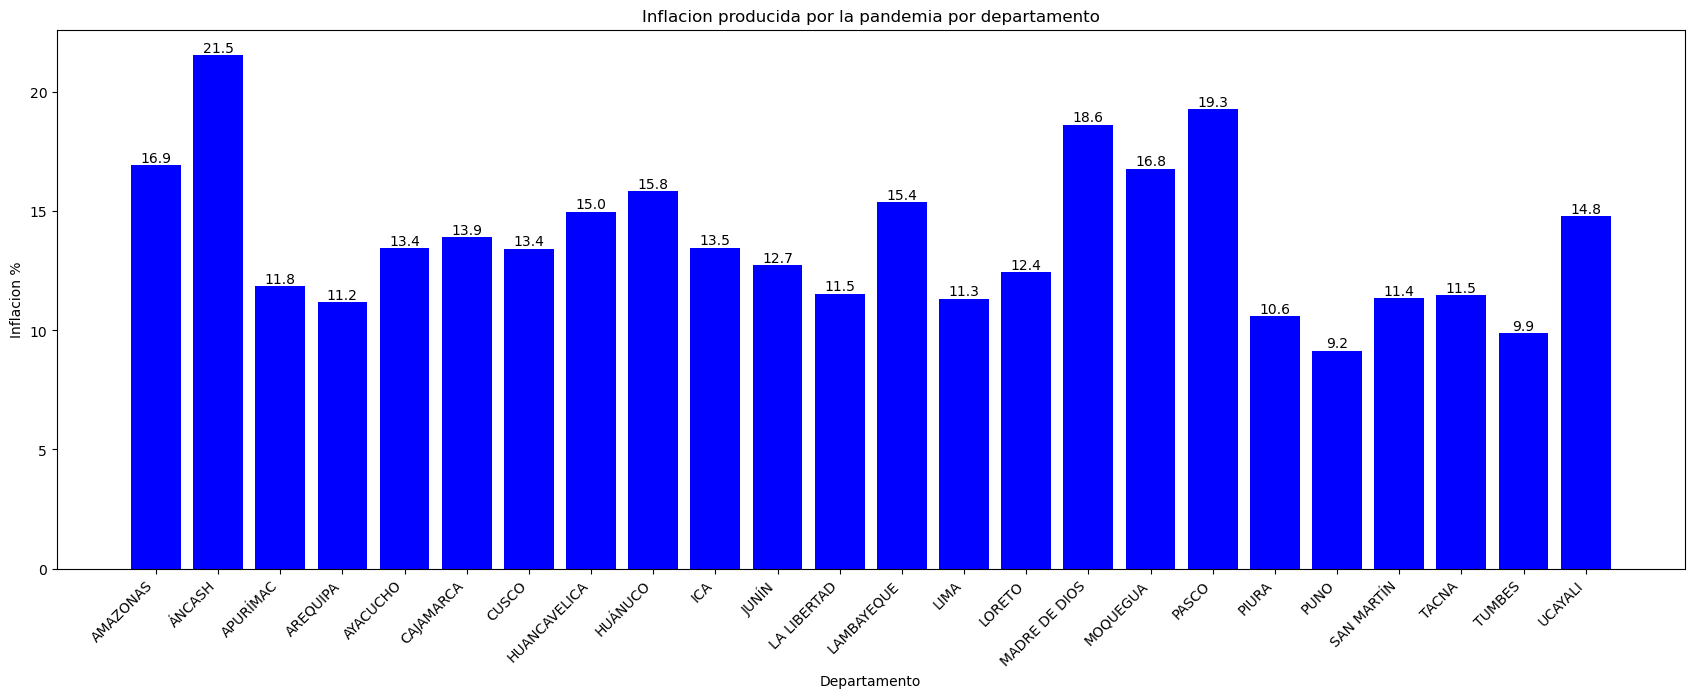

In [42]:
df_infla_pandemia = df_infla_dep_2022-df_infla_dep_2022_proy
df_infla_pandemia = df_infla_pandemia.round(decimals=2).dropna()
df_infla_pandemia
plt.figure(figsize=(21, 7))
bars = plt.bar(df_infla_pandemia.columns, df_infla_pandemia.values[0], color='blue')
plt.xlabel('Departamento')
plt.ylabel('Inflacion %')
plt.title('Inflacion producida por la pandemia por departamento')
plt.xticks(df_infla_pandemia.columns, rotation=45, ha='right')
#plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 1), ha='center', va='bottom')
plt.show()

### Parte 3: Análisis de los beneficiarios en el 4° trimestre 2022 de la Oficina de Normalización Previsional - ONP

#### Volumen de pensiones entregadas por departamento

En el siguiente segmento de nuestra investigación, iniciaremos el análisis de la base de datos de los beneficiarios de la Oficina de Normalización Previsional (ONP), extraída de la Plataforma Nacional de Datos Abiertos. Inicialmente, dirigiremos nuestra atención hacia los registros correspondientes al 4° trimestre del 2022, dado que estos se encuentran particularmente afectados por la notable devaluación de las pensiones, consecuencia directa de la alta inflación experimentada durante los años 2021 y 2022.

La información contenida en la base de datos del 4° trimestre del 2022 comprende una tabla que incluye beneficiarios únicos, junto con sus respectivos detalles, tales como departamento de residencia, edad, monto de la pensión, beneficios, bonificaciones, entre otros. Es fundamental destacar que estos datos estan anonimizados meticulosamente, respetando las buenas prácticas en la protección de datos personales para preservar la privacidad e identidad de los beneficiarios.

Para facilitar la comprensión de los resultados, procederemos a la agregación de las pensiones por departamento y del número de beneficiarios por departamento. Utilizaremos esta información para generar gráficos que proporcionarán una representación visual clara y efectiva de estos valores. Es esencial señalar que, con fines analíticos, consideraremos al Callao y Lima Metropolitana como una entidad única, dada su similitud en términos de inflación y condiciones socioeconómicas.

In [43]:
# La inflacion  de los 5 primeros es mayor al 16.0
# Lectura de archivos de base de datos afiliados ONP
path_BD_SNP = os.path.join(os.getcwd(),'BD\BD_SNP')
lista_BD_SNP = os.listdir(path_BD_SNP)
BD_SNP = pd.DataFrame()

for file in lista_BD_SNP:
    try:
        path_BD_SNP_file = path_BD_SNP + "\\" + file
        DF_SNP = pd.read_csv(path_BD_SNP_file, sep=";", dtype = str)
        DF_SNP.insert(0,"Archivo_Origen", str(file))
        BD_SNP = pd.concat([BD_SNP,DF_SNP])
        print(f"Archivo {file} cargado")
    except Exception as e:
        print(f"Error encontrado en el archivo {file} : {e}")
BD_SNP.head()




Archivo SNP_2020-08.csv cargado
Archivo SNP_2020-12.csv cargado
Archivo SNP_2021-03.csv cargado
Archivo SNP_2021-06.csv cargado
Archivo SNP_2021-09.csv cargado
Archivo SNP_2021-12.csv cargado
Archivo SNP_2022-03.csv cargado
Archivo SNP_2022-06.csv cargado
Archivo SNP_2022-09.csv cargado
Archivo SNP_2022-12.csv cargado
Archivo SNP_2023-03.csv cargado


,Archivo_Origen,id_persona,sexopen,fnacpen,edadpen,redadpen,estcivil,fnaccon,prestacion,prestacion2,prestacion3,prestacion4,dpto,modalidad,pension,anios_aporte,bonif1,bonif2,bonif3,bonif4,bonif5,bonif6,bonif7,bonif8,bonif9
0,SNP_2020-08.csv,3819100,1,8/04/1924,96,7,2,NaN,2,1,1,NaN,10,NaN,511,24,NaN,NaN,106.58,NaN,NaN,30,NaN,45.709999,NaN
1,SNP_2020-08.csv,5625100,0,24/02/1949,71,3,NaN,NaN,1,1,2,NaN,14,NaN,500,NaN,NaN,NaN,NaN,NaN,50,NaN,NaN,45.709999,NaN
2,SNP_2020-08.csv,8357100,1,21/06/1934,86,6,NaN,NaN,2,1,1,NaN,14,1,696,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SNP_2020-08.csv,10718100,0,17/11/1952,67,2,2,NaN,2,1,1,NaN,14,4,500,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SNP_2020-08.csv,11153100,0,25/09/1948,71,3,2,NaN,2,1,1,NaN,14,1,850,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
BD_SNP_2022_4T = BD_SNP[BD_SNP["Archivo_Origen"]=="SNP_2022-12.csv"]
BD_SNP_2022_4T["pension"] = pd.to_numeric(BD_SNP_2022_4T["pension"])
BD_SNP_2022_4T["dpto"] = BD_SNP_2022_4T["dpto"].replace({"24":"14"}) # Se remplaza Callao:24 para integrarlo dentro de Lima:14 ya que se puede inferir que tienen similar comportamiento de inflacion
BD_SNP_2022_4T = BD_SNP_2022_4T.groupby("dpto").agg({"pension":["sum"],"dpto":["count"]}).reset_index()
BD_SNP_2022_4T.round(decimals=2)
BD_SNP_2022_4T.columns = ["Departamento", "Suma_pensiones", "Frec_pensionistas"]
BD_SNP_2022_4T

C:\Users\gonza\AppData\Local\Temp\ipykernel_7588\812879238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BD_SNP_2022_4T["pension"] = pd.to_numeric(BD_SNP_2022_4T["pension"])
C:\Users\gonza\AppData\Local\Temp\ipykernel_7588\812879238.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BD_SNP_2022_4T["dpto"] = BD_SNP_2022_4T["dpto"].replace({"24":"14"}) # Se remplaza Callao:24 para integrarlo dentro de Lima:14 ya que se puede inferir que tienen similar comportamiento de inflacion


,Departamento,Suma_pensiones,Frec_pensionistas
0,1,732936.89,1402
1,10,13525207.94,25736
2,11,14597652.47,23149
3,12,19641985.17,35152
4,13,19275852.27,34536
5,14,194053811.22,361000
6,15,2403084.95,4654
7,16,252368.02,468
8,17,2514898.39,3479
9,18,2901862.13,4381


En el presente gráfico, se observa que el monto acumulado de las pensiones de los beneficiarios se concentra principalmente en Lima, con una presencia notablemente menor en los demás departamentos. Este fenómeno podría atribuirse a la centralización de la actividad económica en Lima, así como a la mayor proporción de trabajadores formales que realizaron aportes durante su participación en la PEA (Población Económicamente Activa). Este patrón evidencia una distribución asimétrica de los fondos acumulados, resaltando la importancia de considerar los factores regionales y laborales al analizar la distribución de las pensiones entre los beneficiarios.

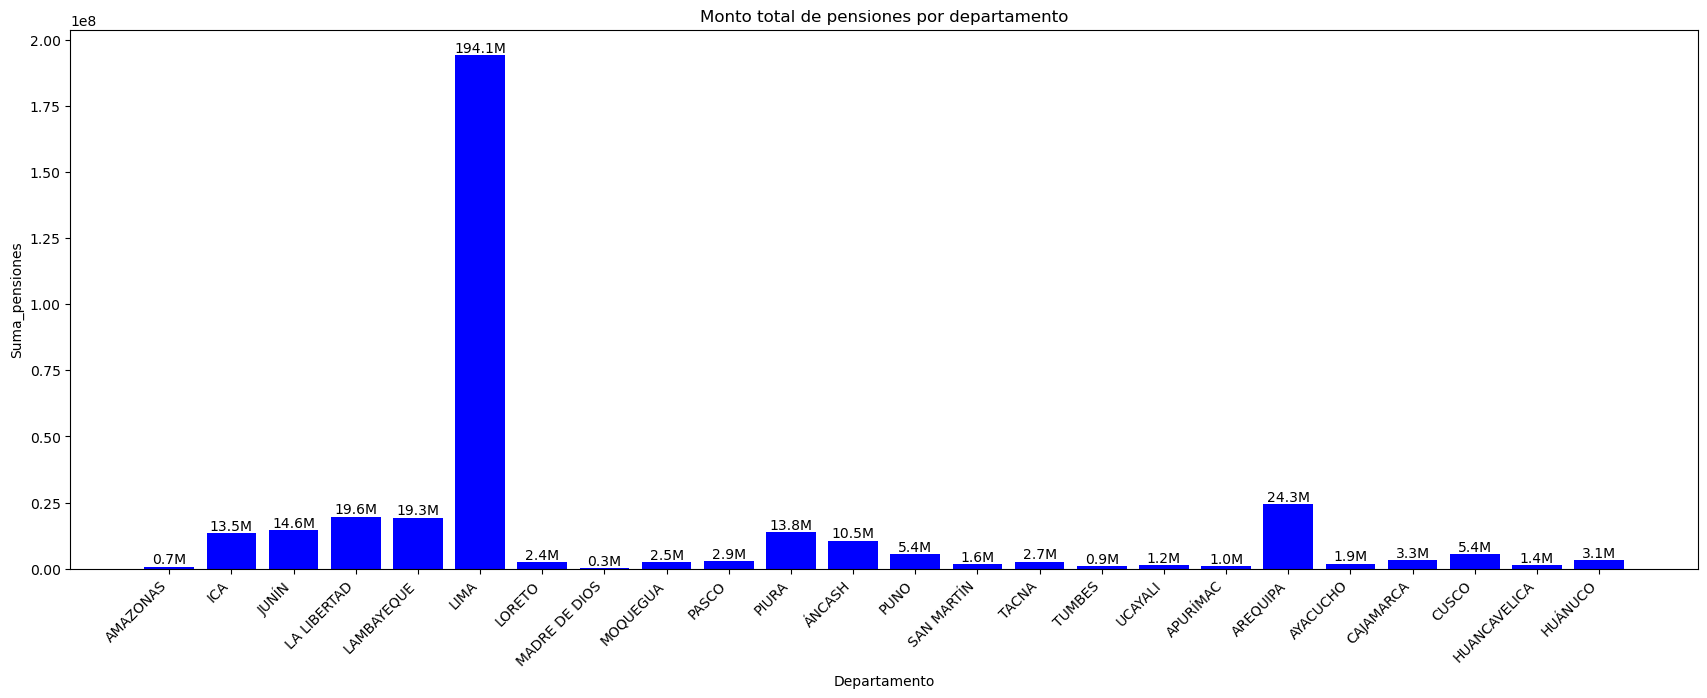

In [45]:
#lista_departamentos = {"1":"AMAZONAS","2":"ÁNCASH","3":"APURÍMAC","4":"AREQUIPA","5":"AYACUCHO","6":"CAJAMARCA","7":"CUSCO","8":"HUANCAVELICA","9":"HUÁNUCO","10":"ICA","11":"JUNÍN","12":"LA LIBERTAD","13":"LAMBAYEQUE","14":"LIMA","15":"LORETO","16":"MADRE DE DIOS","17":"MOQUEGUA","18":"PASCO","19":"PIURA","20":"PUNO","21":"SAN MARTÍN","22":"TACNA","23":"TUMBES","24":"CALLAO","25":"UCAYALI","26":"EXTRANJERO"}
#CALLAO : 24 SE CONSIDERARA DENTRO DE LIMA : 14
lista_departamentos = {"1":"AMAZONAS","2":"ÁNCASH","3":"APURÍMAC","4":"AREQUIPA","5":"AYACUCHO","6":"CAJAMARCA","7":"CUSCO","8":"HUANCAVELICA","9":"HUÁNUCO","10":"ICA","11":"JUNÍN","12":"LA LIBERTAD","13":"LAMBAYEQUE","14":"LIMA","15":"LORETO","16":"MADRE DE DIOS","17":"MOQUEGUA","18":"PASCO","19":"PIURA","20":"PUNO","21":"SAN MARTÍN","22":"TACNA","23":"TUMBES","24":"LIMA","25":"UCAYALI","26":"EXTRANJERO"}
BD_SNP_2022_4T["Departamento"] = BD_SNP_2022_4T["Departamento"].replace(lista_departamentos)
plt.figure(figsize=(21, 7))
bars = plt.bar(BD_SNP_2022_4T["Departamento"], BD_SNP_2022_4T["Suma_pensiones"], color='blue')
plt.xlabel('Departamento')
plt.ylabel('Suma_pensiones')
plt.title('Monto total de pensiones por departamento')
plt.xticks(BD_SNP_2022_4T["Departamento"], rotation=45, ha='right')
#plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    yval = bar.get_height() / 1_000_000
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, f'{round(yval, 1)}M', ha='center', va='bottom')
plt.show()

#### Volumen de pensiones entregadas por departamento (No Lima)

Con el propósito de obtener una comprensión más detallada de la distribución mencionada, en el siguiente gráfico se excluye deliberadamente al departamento de Lima. Esta exclusión permite una visualización más nítida de las disparidades, evidenciando que los departamentos de Arequipa, La Libertad, Lambayeque, Junin y Piura destacan al presentar el mayor monto acumulado de pensiones entre los departamentos despues de Lima. Esta tendencia podría explicarse por la presencia de las ciudades más grandes después de Lima en estos departamentos, las cuales albergan una significativa actividad económica y una mayor proporción de empleo formal. Este análisis restringido proporciona una perspectiva más focalizada de la distribución de las pensiones, enfocándose en los factores regionales que contribuyen a las variaciones observadas.

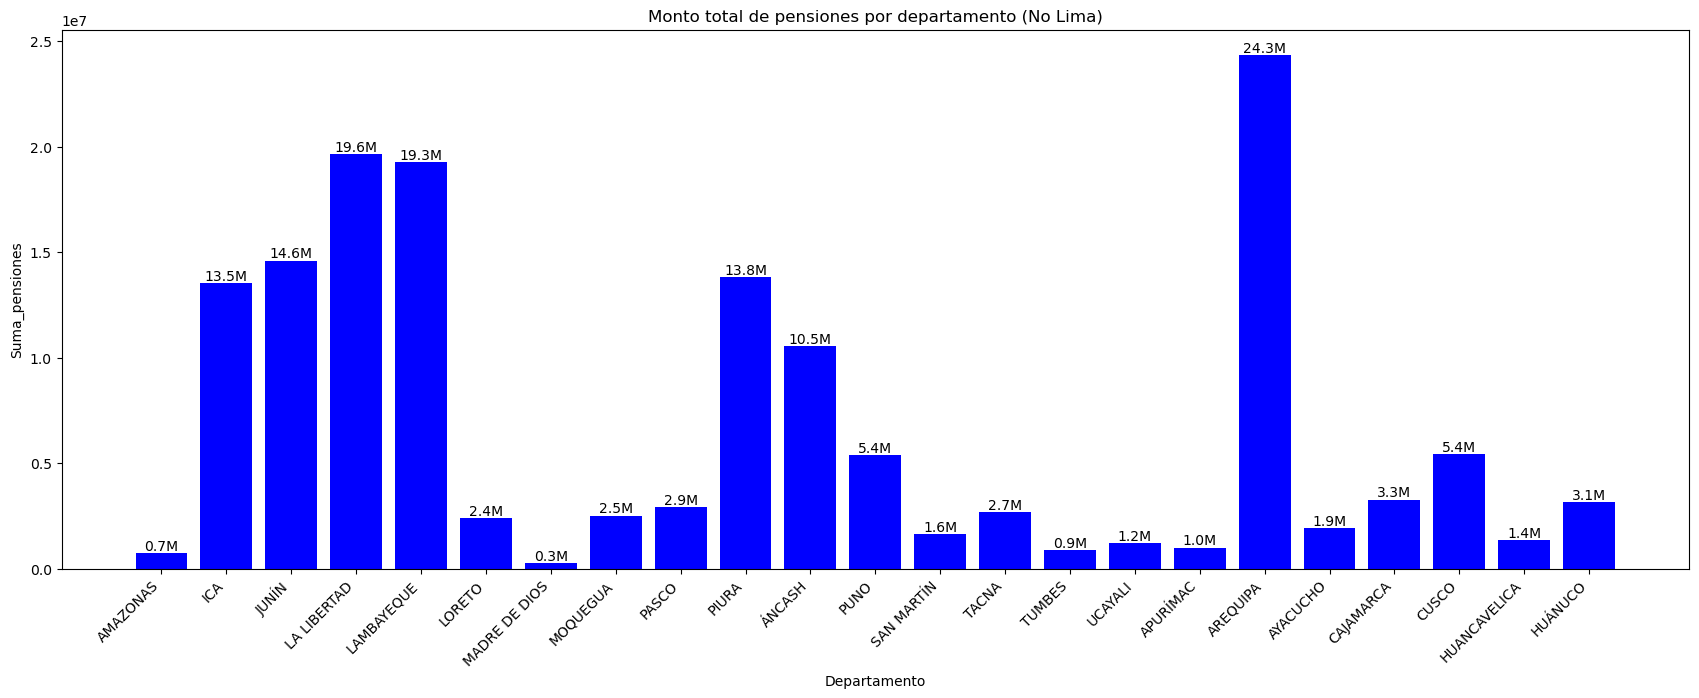

In [46]:
BD_SNP_2022_4T_NOLIMA = BD_SNP_2022_4T[BD_SNP_2022_4T["Departamento"] != "LIMA"]
plt.figure(figsize=(21, 7))
bars = plt.bar(BD_SNP_2022_4T_NOLIMA["Departamento"], BD_SNP_2022_4T_NOLIMA["Suma_pensiones"], color='blue')
plt.xlabel('Departamento')
plt.ylabel('Suma_pensiones')
plt.title('Monto total de pensiones por departamento (No Lima)')
plt.xticks(BD_SNP_2022_4T_NOLIMA["Departamento"], rotation=45, ha='right')
for bar in bars:
    yval = bar.get_height() / 1_000_000
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05 , f'{round(yval, 1)}M', ha='center', va='bottom')
plt.show()

#### Numero de beneficiarios por departamento (No Lima)

De manera análoga, se observa que, tras Lima, Arequipa destaca como el departamento con el mayor número de beneficiarios de la ONP, seguido por La Libertad, Lambayeque, Piura e Ica. Se identifica una similitud en los tres primeros departamentos, tanto en el total de pensiones como en el número de pensionistas, siendo Arequipa, La Libertad y Lambayeque los más destacados en ambas categorías. Sin embargo, se destaca que, a pesar de que Junín presenta un monto de pensiones superior, cuenta con un menor número de pensionistas en comparación con Piura. Este análisis revela variaciones significativas en la distribución de beneficios entre los departamentos, indicando posibles diferencias en términos de densidad de beneficiarios y montos de pensiones en distintas regiones del país.

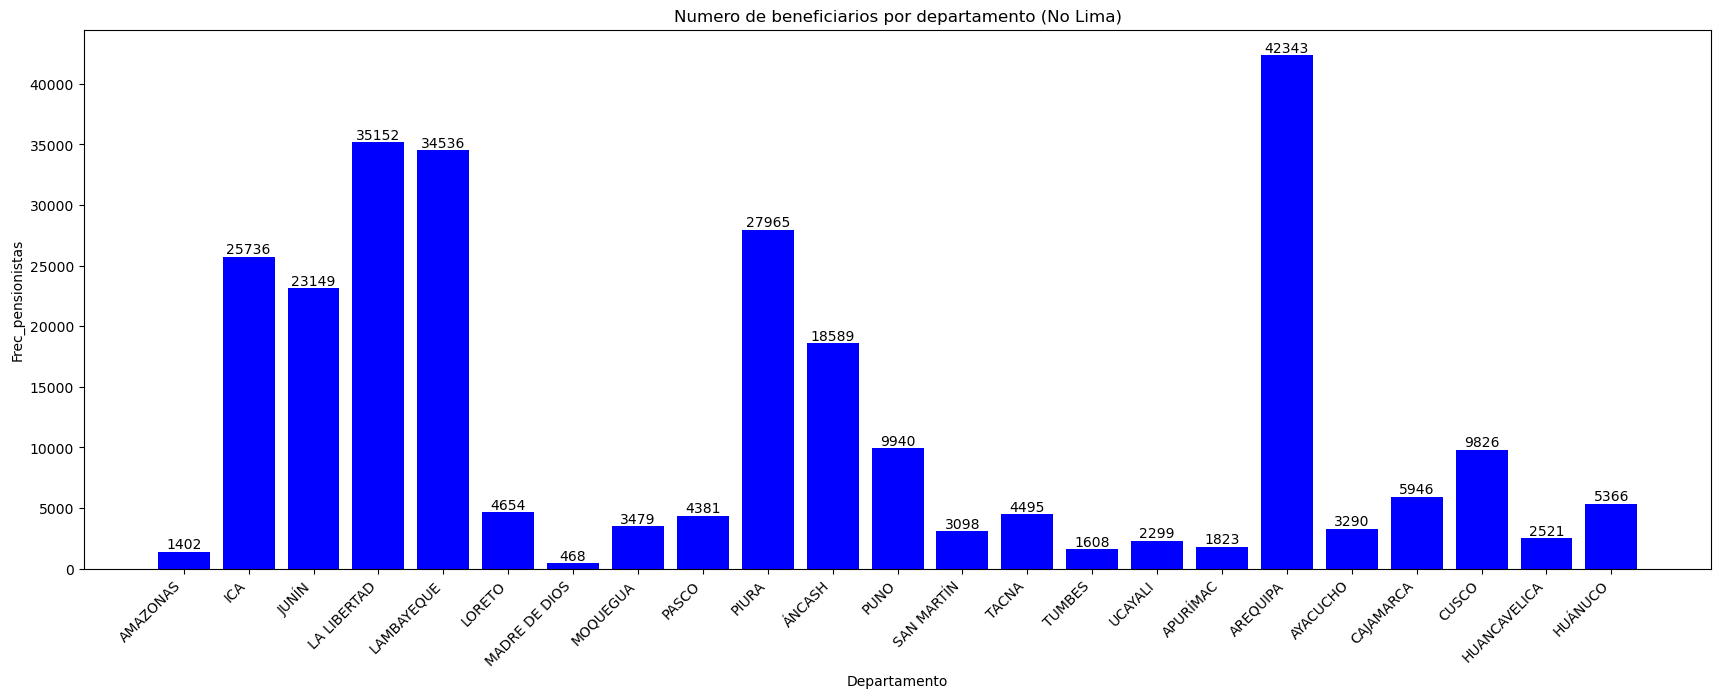

In [47]:
plt.figure(figsize=(21, 7))
bars = plt.bar(BD_SNP_2022_4T_NOLIMA["Departamento"], BD_SNP_2022_4T_NOLIMA["Frec_pensionistas"], color='blue')
plt.xlabel('Departamento')
plt.ylabel('Frec_pensionistas')
plt.title('Numero de beneficiarios por departamento (No Lima)')
plt.xticks(BD_SNP_2022_4T_NOLIMA["Departamento"], rotation=45, ha='right')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05 , yval, ha='center', va='bottom')
plt.show()

#### Pensiones promedio por departamento (No Lima)

Al examinar estas variables como un cociente del total de pensiones entre el número de beneficiarios, se destaca que Moquegua, Junín y Pasco son los departamentos que reciben las mayores pensiones en términos generales. Por otro lado, departamentos como Arequipa, La Libertad y Lambayeque, que previamente destacaban, presentan valores intermedios en este análisis. Además Piura exhibe uno de los valores más bajos en este indicador. Esta evaluación en términos relativos permite discernir las diferencias en la distribución de las pensiones entre los departamentos, subrayando la variabilidad en la asignación de recursos de la ONP en función del número de beneficiarios.

C:\Users\gonza\AppData\Local\Temp\ipykernel_7588\813473899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BD_SNP_2022_4T_NOLIMA["Ratio"] = BD_SNP_2022_4T_NOLIMA["Suma_pensiones"] / BD_SNP_2022_4T_NOLIMA["Frec_pensionistas"]


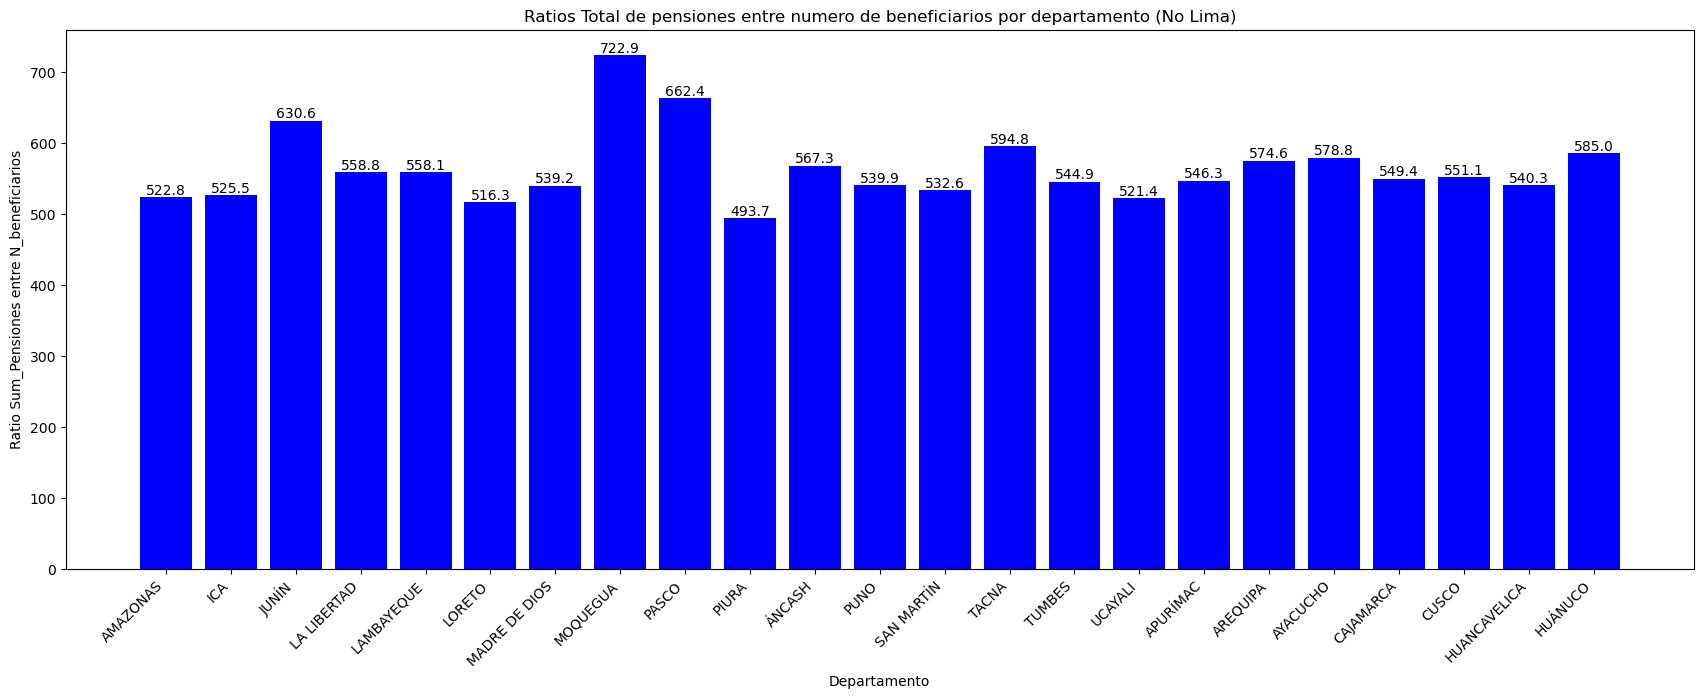

In [48]:
BD_SNP_2022_4T_NOLIMA["Ratio"] = BD_SNP_2022_4T_NOLIMA["Suma_pensiones"] / BD_SNP_2022_4T_NOLIMA["Frec_pensionistas"]
plt.figure(figsize=(21, 7))
bars = plt.bar(BD_SNP_2022_4T_NOLIMA["Departamento"], BD_SNP_2022_4T_NOLIMA["Ratio"], color='blue')
plt.xlabel('Departamento')
plt.ylabel('Ratio Sum_Pensiones entre N_beneficiarios')
plt.title('Ratios Total de pensiones entre numero de beneficiarios por departamento (No Lima)')
plt.xticks(BD_SNP_2022_4T_NOLIMA["Departamento"], rotation=45, ha='right')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05 , round(yval, 1), ha='center', va='bottom')
plt.show()

#### Distribución del Monto de Pensiones por Departamento

En el presente gráfico que representa la distribución de las pensiones por departamento, se observa que la mayoría de las pensiones se sitúan en torno a los 500 soles. No obstante, la presencia de valores atípicos, con valores superior a 1500 soles, genera distorsiones en el gráfico, dado que el número de beneficiarios con pensiones comprendidas entre 1500 y hasta 7000 soles es reducido. Específicamente, los departamentos de Junín, Pasco y Moquegua exhiben distribuciones de pensiones con límites más amplios y superiores en comparación con el resto de los departamentos. Este análisis proporciona una visión detallada de la variabilidad en las pensiones, resaltando la presencia de valores atípicos que impactan la distribución general en diferentes regiones del país.

C:\Users\gonza\AppData\Local\Temp\ipykernel_7588\521030766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BD_SNP_2022_4T_BOX["pension"] = pd.to_numeric(BD_SNP_2022_4T_BOX["pension"])
C:\Users\gonza\AppData\Local\Temp\ipykernel_7588\521030766.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BD_SNP_2022_4T_BOX["dpto"] = BD_SNP_2022_4T_BOX["dpto"].replace({"24":"14"}) # Se remplaza Callao:24 para integrarlo dentro de Lima:14 ya que se puede inferir que tienen similar comportamiento de inflacion
C:\User

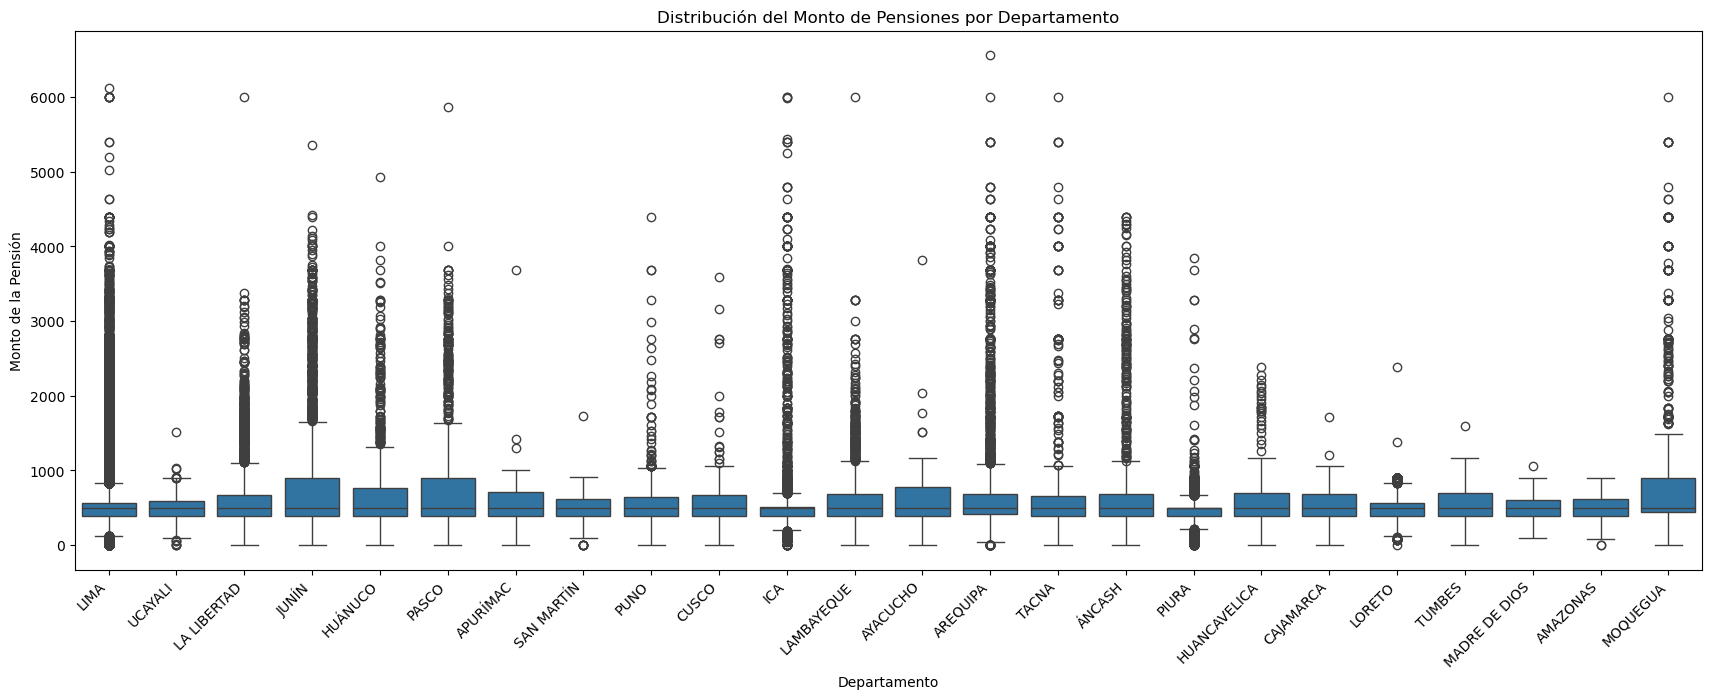

In [49]:
BD_SNP_2022_4T_BOX = BD_SNP[BD_SNP["Archivo_Origen"]=="SNP_2022-12.csv"]
BD_SNP_2022_4T_BOX["pension"] = pd.to_numeric(BD_SNP_2022_4T_BOX["pension"])
BD_SNP_2022_4T_BOX["dpto"] = BD_SNP_2022_4T_BOX["dpto"].replace({"24":"14"}) # Se remplaza Callao:24 para integrarlo dentro de Lima:14 ya que se puede inferir que tienen similar comportamiento de inflacion
lista_departamentos = {"1":"AMAZONAS","2":"ÁNCASH","3":"APURÍMAC","4":"AREQUIPA","5":"AYACUCHO","6":"CAJAMARCA","7":"CUSCO","8":"HUANCAVELICA","9":"HUÁNUCO","10":"ICA","11":"JUNÍN","12":"LA LIBERTAD","13":"LAMBAYEQUE","14":"LIMA","15":"LORETO","16":"MADRE DE DIOS","17":"MOQUEGUA","18":"PASCO","19":"PIURA","20":"PUNO","21":"SAN MARTÍN","22":"TACNA","23":"TUMBES","24":"LIMA","25":"UCAYALI","26":"EXTRANJERO"}
BD_SNP_2022_4T_BOX["dpto"] = BD_SNP_2022_4T_BOX["dpto"].replace(lista_departamentos)
plt.figure(figsize=(21, 7))
sns.boxplot(x='dpto', y='pension', data=BD_SNP_2022_4T_BOX)
plt.title('Distribución del Monto de Pensiones por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Monto de la Pensión')
plt.xticks(rotation=45, ha='right')  # Ajusta la rotación de las etiquetas si es necesario
plt.show()

##### Analisis de pensiones - Valores típico

Al filtrar la distribución previamente presentada para incluir únicamente pensiones inferiores a 1500 soles, se evidencia con mayor claridad que los departamentos de Junín, Pasco y Moquegua muestran percentiles máximos más elevados y una distribución de pensiones con una proporción superior a la mediana de 500 soles, en comparación con el resto de los departamentos. Por otro lado, Piura exhibe uno de los percentiles más bajos, con aproximadamente el 75% de sus pensiones ubicadas por debajo de la mediana de 500 soles. En cuanto a los departamentos de Arequipa, La Libertad y Lambayeque, se observa un comportamiento similar en la distribución de sus pensiones. Este análisis focalizado permite discernir con mayor precisión las diferencias en la distribución de las pensiones entre los distintos departamentos, destacando las disparidades en los valores y la proporción de pensiones por debajo de la mediana establecida.

C:\Users\gonza\AppData\Local\Temp\ipykernel_7588\2777128422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BD_SNP_2022_4T_NOLIMA_BOX["pension"] = pd.to_numeric(BD_SNP_2022_4T_NOLIMA_BOX["pension"])


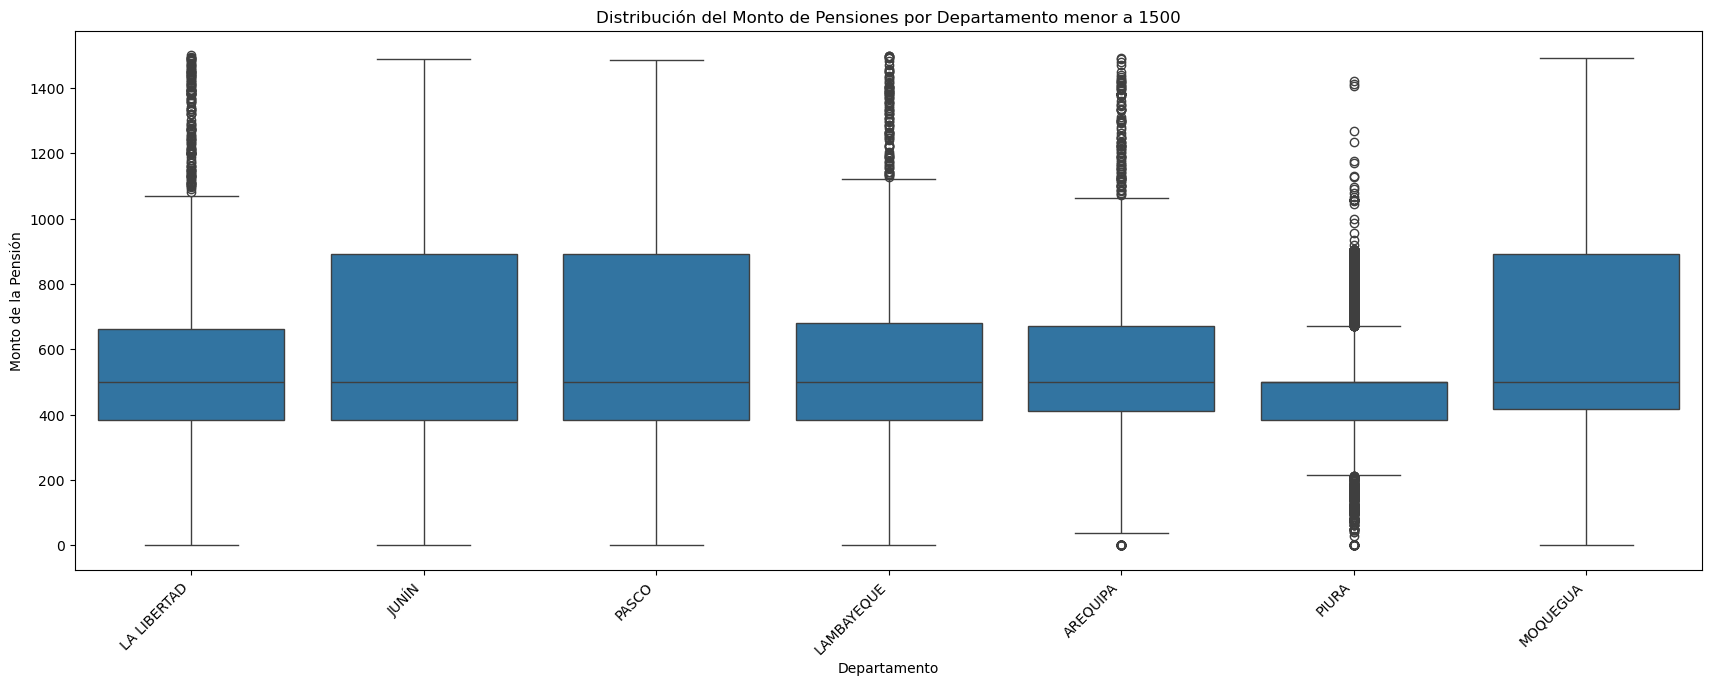

In [50]:
BD_SNP_2022_4T_NOLIMA_BOX = BD_SNP[BD_SNP["Archivo_Origen"]=="SNP_2022-12.csv"]
BD_SNP_2022_4T_NOLIMA_BOX["pension"] = pd.to_numeric(BD_SNP_2022_4T_NOLIMA_BOX["pension"])
BD_SNP_2022_4T_NOLIMA_BOX = BD_SNP_2022_4T_NOLIMA_BOX[BD_SNP_2022_4T_NOLIMA_BOX["pension"]<1500]
BD_SNP_2022_4T_NOLIMA_BOX["dpto"] = BD_SNP_2022_4T_NOLIMA_BOX["dpto"].replace({"24":"14"}) # Se remplaza Callao:24 para integrarlo dentro de Lima:14 ya que se puede inferir que tienen similar comportamiento de inflacion
lista_departamentos = {"1":"AMAZONAS","2":"ÁNCASH","3":"APURÍMAC","4":"AREQUIPA","5":"AYACUCHO","6":"CAJAMARCA","7":"CUSCO","8":"HUANCAVELICA","9":"HUÁNUCO","10":"ICA","11":"JUNÍN","12":"LA LIBERTAD","13":"LAMBAYEQUE","14":"LIMA","15":"LORETO","16":"MADRE DE DIOS","17":"MOQUEGUA","18":"PASCO","19":"PIURA","20":"PUNO","21":"SAN MARTÍN","22":"TACNA","23":"TUMBES","24":"LIMA","25":"UCAYALI","26":"EXTRANJERO"}
BD_SNP_2022_4T_NOLIMA_BOX["dpto"] = BD_SNP_2022_4T_NOLIMA_BOX["dpto"].replace(lista_departamentos)
lista_dpto_box = ["AREQUIPA","LA LIBERTAD","LAMBAYEQUE","JUNÍN","PIURA","MOQUEGUA","PASCO"]
BD_SNP_2022_4T_NOLIMA_BOX = BD_SNP_2022_4T_NOLIMA_BOX[BD_SNP_2022_4T_NOLIMA_BOX["dpto"].isin(lista_dpto_box)]
plt.figure(figsize=(21, 7))
sns.boxplot(x='dpto', y='pension', data=BD_SNP_2022_4T_NOLIMA_BOX)
plt.title('Distribución del Monto de Pensiones por Departamento menor a 1500')
plt.xlabel('Departamento')
plt.ylabel('Monto de la Pensión')
plt.xticks(rotation=45, ha='right')  # Ajusta la rotación de las etiquetas si es necesario
plt.show()

##### Analisis de pensiones - Valores atípico

Al realizar un análisis de los valores atípicos al filtrar las pensiones superiores a 1500 soles, se observa que los departamentos de Arequipa y Moquegua destacan por tener las mayores pensiones en sus respectivos percentiles. Sin embargo, es importante señalar que la mediana en este contexto presenta una variabilidad más amplia, cercana a los 2500 soles. Por otro lado, los departamentos de La Libertad y Lambayeque muestran una distribución con valores más bajos en los percentiles.

C:\Users\gonza\AppData\Local\Temp\ipykernel_7588\2178587010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BD_SNP_2022_4T_NOLIMA_BOX["pension"] = pd.to_numeric(BD_SNP_2022_4T_NOLIMA_BOX["pension"])


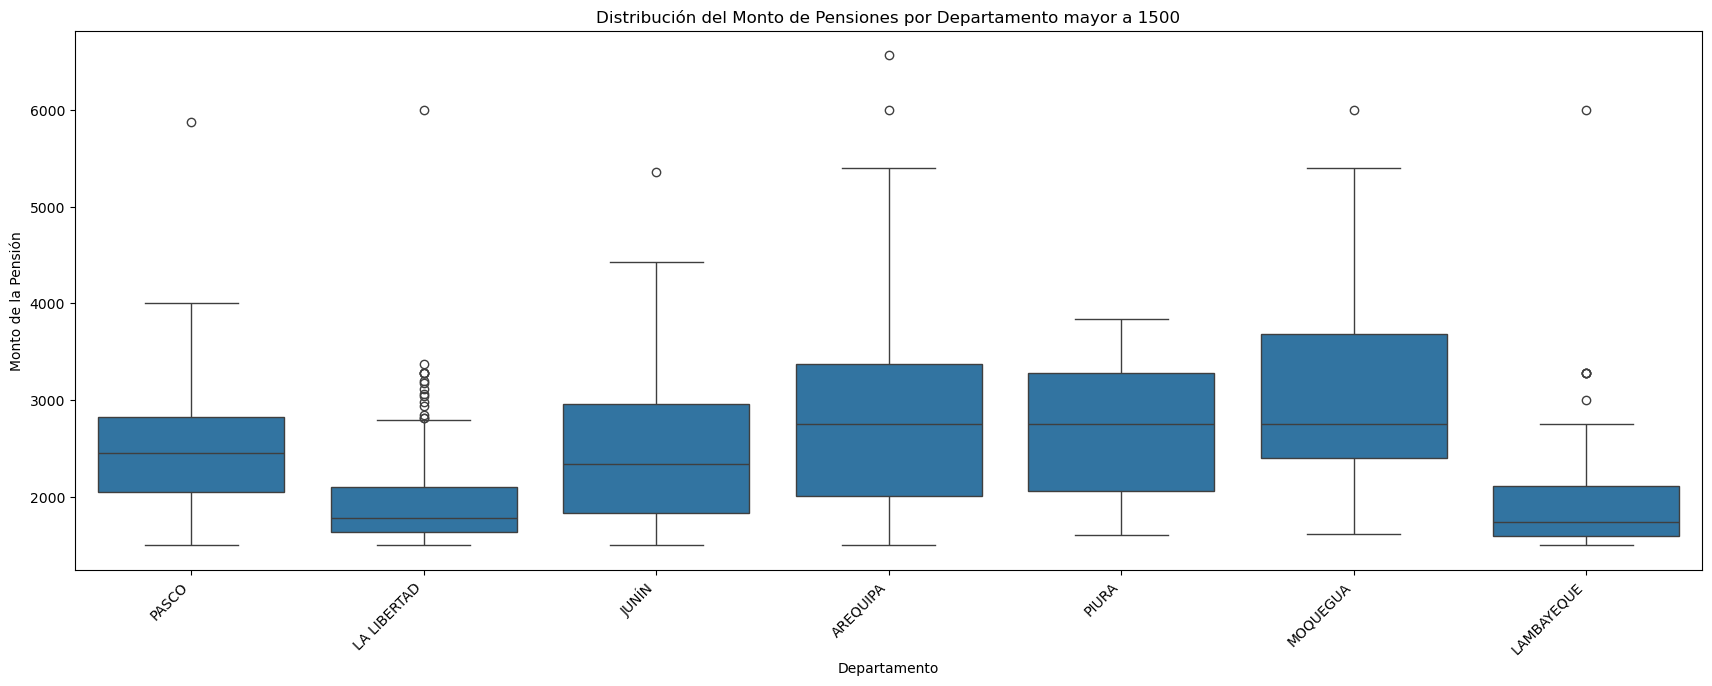

In [51]:
BD_SNP_2022_4T_NOLIMA_BOX = BD_SNP[BD_SNP["Archivo_Origen"]=="SNP_2022-12.csv"]
BD_SNP_2022_4T_NOLIMA_BOX["pension"] = pd.to_numeric(BD_SNP_2022_4T_NOLIMA_BOX["pension"])
BD_SNP_2022_4T_NOLIMA_BOX = BD_SNP_2022_4T_NOLIMA_BOX[BD_SNP_2022_4T_NOLIMA_BOX["pension"]>1500]
BD_SNP_2022_4T_NOLIMA_BOX["dpto"] = BD_SNP_2022_4T_NOLIMA_BOX["dpto"].replace({"24":"14"}) # Se remplaza Callao:24 para integrarlo dentro de Lima:14 ya que se puede inferir que tienen similar comportamiento de inflacion
lista_departamentos = {"1":"AMAZONAS","2":"ÁNCASH","3":"APURÍMAC","4":"AREQUIPA","5":"AYACUCHO","6":"CAJAMARCA","7":"CUSCO","8":"HUANCAVELICA","9":"HUÁNUCO","10":"ICA","11":"JUNÍN","12":"LA LIBERTAD","13":"LAMBAYEQUE","14":"LIMA","15":"LORETO","16":"MADRE DE DIOS","17":"MOQUEGUA","18":"PASCO","19":"PIURA","20":"PUNO","21":"SAN MARTÍN","22":"TACNA","23":"TUMBES","24":"LIMA","25":"UCAYALI","26":"EXTRANJERO"}
BD_SNP_2022_4T_NOLIMA_BOX["dpto"] = BD_SNP_2022_4T_NOLIMA_BOX["dpto"].replace(lista_departamentos)
lista_dpto_box = ["AREQUIPA","LA LIBERTAD","LAMBAYEQUE","JUNÍN","PIURA","MOQUEGUA","PASCO"]
BD_SNP_2022_4T_NOLIMA_BOX = BD_SNP_2022_4T_NOLIMA_BOX[BD_SNP_2022_4T_NOLIMA_BOX["dpto"].isin(lista_dpto_box)]
plt.figure(figsize=(21, 7))
sns.boxplot(x='dpto', y='pension', data=BD_SNP_2022_4T_NOLIMA_BOX)
plt.title('Distribución del Monto de Pensiones por Departamento mayor a 1500')
plt.xlabel('Departamento')
plt.ylabel('Monto de la Pensión')
plt.xticks(rotation=45, ha='right')  # Ajusta la rotación de las etiquetas si es necesario
plt.show()

#### Depreciacion de pensiones por departamento (No Lima) 2021-2022

Dado que ya hemos calculado la inflación acumulada para los años 2021 y 2022, podemos proceder a obtener su valor presente con respecto al año base, que en este caso es 2020. Al calcular la depreciación del valor, observamos que los principales departamentos afectados en términos absolutos son Arequipa (2176.3 miles de soles), La Libertad (1702.1 miles de soles), Piura (1302.6 miles de soles) y Lambayeque (1254.1 miles de soles), en términos de pérdida de poder adquisitivo debido a la inflación provocada por la pandemia de COVID-19.

Esta situación se atribuye no solo a los montos más altos de las pensiones de los jubilados en estos departamentos, sino también a la frecuencia de beneficiarios, ya que gran parte de los beneficiarios de la ONP, después de Lima, se concentran en estas áreas. Por otro lado, en departamentos con una mayor informalidad laboral y actividad económica, como Ancash, Madre de Dios, Amazonas, Moquegua y Pasco, a pesar de registrar altos valores acumulados de inflación durante el periodo analizado, el impacto en la pérdida de poder adquisitivo debido a la inflación es menos evidente debido a un menor número de jubilados y montos de pensiones. Sin embargo, es importante tener en cuenta que este análisis no considera a los adultos mayores de estos departamentos que no reciben jubilación, lo cual puede ser un factor relevante a tener en cuenta en futuros estudios.

In [52]:
df_infla_pandemia = df_infla_dep_2022-df_infla_dep_2022_proy
df_infla_pandemia = df_infla_pandemia.round(decimals=2).dropna()
df_infla_pandemia = df_infla_pandemia.melt(value_vars=df_infla_pandemia.columns, var_name="Departamento", value_name="Inflacion_acum")
BD_SNP_2022_4T = pd.merge(BD_SNP_2022_4T, df_infla_pandemia, on='Departamento', how='left')
BD_SNP_2022_4T["Depreciacion"] = BD_SNP_2022_4T["Suma_pensiones"] / BD_SNP_2022_4T["Inflacion_acum"]
BD_SNP_2022_4T

,Departamento,Suma_pensiones,Frec_pensionistas,Inflacion_acum,Depreciacion
0,AMAZONAS,732936.89,1402,16.92,43317.78
1,ICA,13525207.94,25736,13.47,1004098.59
2,JUNÍN,14597652.47,23149,12.73,1146712.68
3,LA LIBERTAD,19641985.17,35152,11.54,1702078.44
4,LAMBAYEQUE,19275852.27,34536,15.37,1254121.81
5,LIMA,194053811.22,361000,11.33,17127432.59
6,LORETO,2403084.95,4654,12.44,193174.03
7,MADRE DE DIOS,252368.02,468,18.63,13546.32
8,MOQUEGUA,2514898.39,3479,16.79,149785.49
9,PASCO,2901862.13,4381,19.28,150511.52


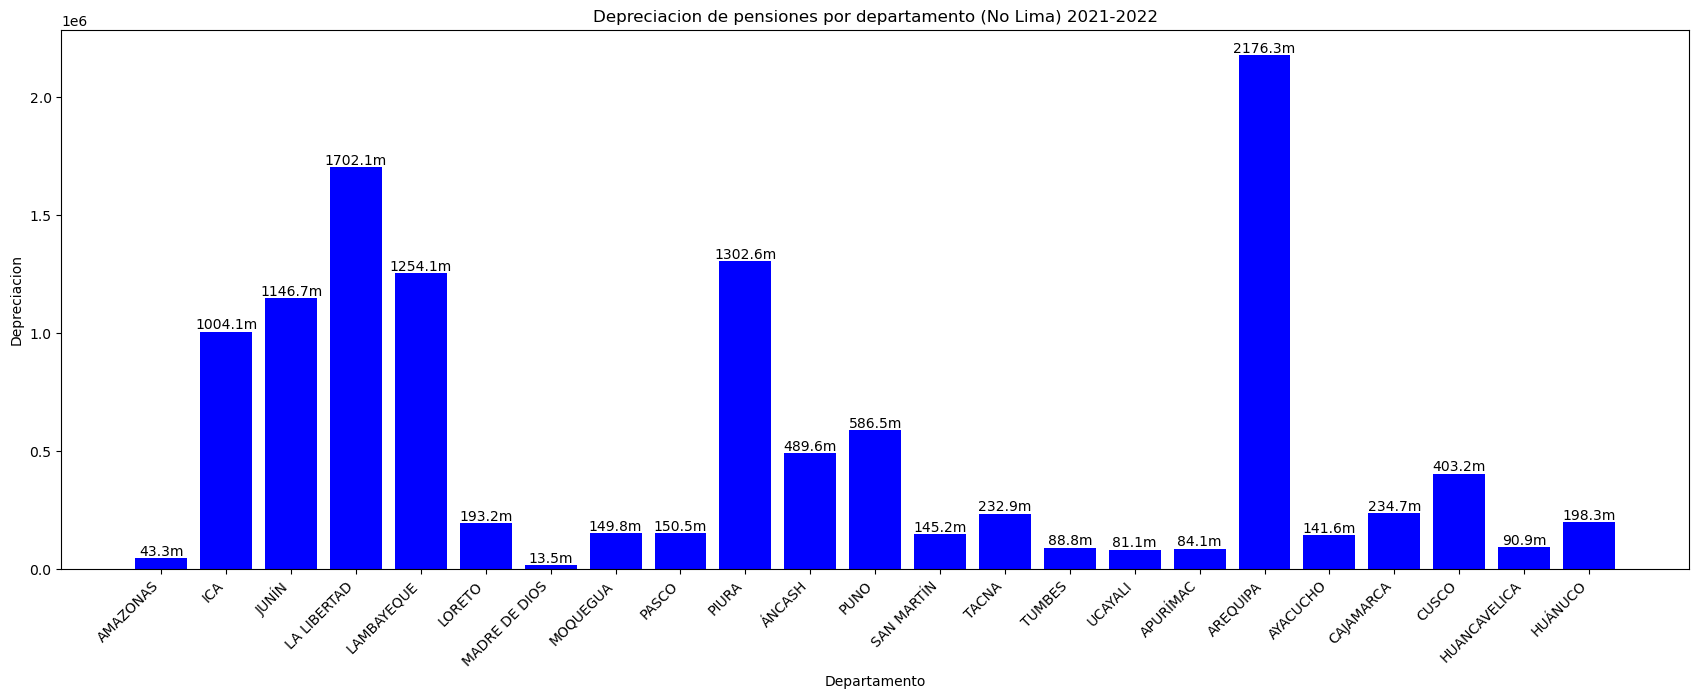

In [53]:

BD_SNP_2022_4T_NOLIMA = BD_SNP_2022_4T[BD_SNP_2022_4T["Departamento"] != "LIMA"]
plt.figure(figsize=(21, 7))
bars = plt.bar(BD_SNP_2022_4T_NOLIMA["Departamento"], BD_SNP_2022_4T_NOLIMA["Depreciacion"], color='blue')
plt.xlabel('Departamento')
plt.ylabel('Depreciacion')
plt.title('Depreciacion de pensiones por departamento (No Lima) 2021-2022')
plt.xticks(BD_SNP_2022_4T_NOLIMA["Departamento"], rotation=45, ha='right')
#plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    yval = bar.get_height() / 1000
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05 , f'{round(yval, 1)}m', ha='center', va='bottom')
plt.show()

In [54]:
BD_SNP_2022_4T = BD_SNP[BD_SNP["Archivo_Origen"]=="SNP_2022-12.csv"]
BD_SNP_2022_4T = BD_SNP_2022_4T[BD_SNP_2022_4T["dpto"]=="4"]
BD_SNP_2022_4T["pension"] = BD_SNP_2022_4T["pension"].astype(float)
BD_SNP_2022_4T["Pension_depreciada"] = BD_SNP_2022_4T["pension"] / df_infla_pandemia[df_infla_pandemia["Departamento"]=="AREQUIPA"]["Inflacion_acum"].values
lista_rango_edad = {"1":"A.Hasta 65 años","2":"B.65 a 70 años","3":"C.71 a 75 años","4":"D.76 a 80 años","5":"E.81 a 85 años","6":"F.86 a 90 años","7":"G.91 a más años"}
BD_SNP_2022_4T["redadpen"] = BD_SNP_2022_4T["redadpen"].replace(lista_rango_edad)
BD_SNP_2022_4T.head(20)
lista_rangos = [0,200,400,600,800,1000,float("inf")]
lista_rangos_labels = ["0-200", "201-400", "401-600", "601-800", "801-1000", "1001+"]
BD_SNP_2022_4T["Rango_pension"] = pd.cut(BD_SNP_2022_4T["pension"], bins=lista_rangos, labels=lista_rangos_labels)

#### Rango de edad de jubilados por rango de pension

Enfocándonos en el departamento de Arequipa, se observa que los pensionistas cuyas pensiones son menores o iguales a 200 soles son recientes, probablemente debido al programa de jubilación anticipada que permite el retiro antes de los 65 años. Sin embargo, este nivel de pensión de jubilación es muy precario y, en conjunto con la inflación que devalúa aún más este monto recibido, resulta preocupante. Según un informe del Banco Mundial, el límite de pobreza extrema se sitúa en 201 soles mensuales per cápita.

Asimismo, se destaca que el segundo grupo más numeroso se encuentra en el rango de pensiones entre 201 y 400 soles. Según datos del INEI, el costo de una canasta básica menor a 378 soles se considera dentro del límite de la pobreza. Por lo tanto, los beneficiarios de la ONP en este segmento podrían estar en riesgo de encontrarse dentro del segmento de la pobreza, y la depreciación de la moneda debido a la inflación podría empeorar aún más su situación, acercándolos a la pobreza extrema.

El siguiente segmento, de pensiones entre 401 y 600 soles, es el grupo principal que se ve afectado por la devaluación provocada por la inflación acumulada en 2021 y 2022, lo que los acerca más al límite de la pobreza. Esta situación pone de manifiesto la importancia de comprender el impacto de la inflación en la situación económica de los pensionistas en Arequipa, destacando la urgencia de políticas que aborden estas preocupaciones y brinden un alivio efectivo a los beneficiarios de la ONP en la región.

In [55]:
BD_SNP_2022_4T_aggrpension = BD_SNP_2022_4T.groupby(["redadpen","Rango_pension"]).agg({"Rango_pension":["count"]}).reset_index()
BD_SNP_2022_4T_aggrpension.head(20)
BD_SNP_2022_4T_aggrpension.columns = ["redadpen","Rango_pension","Frec"]
BD_SNP_2022_4T_aggrpension = BD_SNP_2022_4T_aggrpension.pivot(index="redadpen",columns="Rango_pension", values="Frec").reset_index()
BD_SNP_2022_4T_aggrpension

Rango_pension,redadpen,0-200,201-400,401-600,601-800,801-1000,1001+
0,A.Hasta 65 años,323,1712,2516,231,898,8
1,B.65 a 70 años,22,1981,4164,980,2587,11
2,C.71 a 75 años,19,1666,4502,998,2039,37
3,D.76 a 80 años,12,1469,3289,549,1335,115
4,E.81 a 85 años,8,1240,2552,387,757,222
5,F.86 a 90 años,5,1089,1685,280,400,194
6,G.91 a más años,0,834,837,177,122,50


In [56]:
#BD_SNP_2022_4T_aggrpension[["0-200","201-400","401-600","601-800","801-1000","1001+"]].sum(axis=1)

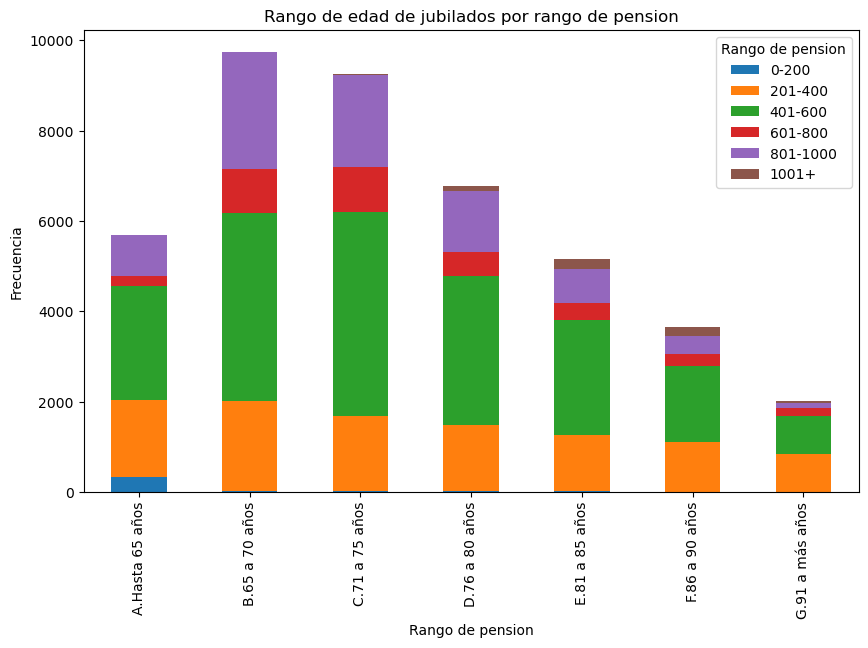

In [57]:
ax = BD_SNP_2022_4T_aggrpension.plot(kind='bar', x="redadpen", stacked=True, figsize=(10, 6))
plt.title('Rango de edad de jubilados por rango de pension')
plt.xlabel('Rango de pension')
plt.ylabel('Frecuencia')
plt.legend(title='Rango de pension', loc='upper right')
plt.show()

#### Rango de edad de jubilados por estado civil

En el análisis anterior del gráfico, se explicó cómo el monto de la pensión de los jubilados los coloca en su mayoría en situaciones de pobreza y pobreza extrema, y cómo la inflación ha reducido su capacidad adquisitiva, empeorando su situación y acercando a aquellos que previamente no estaban en situación de pobreza a esta condición. Sin embargo, es importante señalar que, en el análisis previo, los límites se consideraron como valores per cápita. No obstante, en el siguiente gráfico, se observa que estos beneficiarios son principalmente personas casadas, lo que sugiere que dicho monto de pensión debe, en la mayoría de los casos, cubrir los gastos de al menos dos personas. Esto hace que sea insuficiente incluso en el caso de las personas que tienen una jubilación entre 401 y 600 soles. Este análisis destaca la importancia de considerar no solo los montos absolutos de las pensiones, sino también la composición y las necesidades de los hogares de los beneficiarios al evaluar su situación económica y su capacidad para satisfacer sus necesidades básicas.

In [58]:
BD_SNP_2022_4T_aggredadpen = BD_SNP_2022_4T.groupby(["redadpen","estcivil"]).agg({"redadpen":["count"]}).reset_index()
BD_SNP_2022_4T_aggredadpen.columns = ["redadpen","estcivil","frecuencia"]
lista_estcivil = {"1":"Soltero","2":"Casado","3":"Viudo","4":"Divorciado"}
BD_SNP_2022_4T_aggredadpen["estcivil"] = BD_SNP_2022_4T_aggredadpen["estcivil"].replace(lista_estcivil)
BD_SNP_2022_4T_aggredadpen = BD_SNP_2022_4T_aggredadpen.pivot(index="redadpen",columns="estcivil", values="frecuencia")
BD_SNP_2022_4T_aggredadpen = BD_SNP_2022_4T_aggredadpen.reset_index()
BD_SNP_2022_4T_aggredadpen = BD_SNP_2022_4T_aggredadpen.rename_axis("", axis=1)
#BD_SNP_2022_4T_aggredadpen = BD_SNP_2022_4T_aggredadpen.drop("estcivil",axis=1)
BD_SNP_2022_4T_aggredadpen

,redadpen,Casado,Divorciado,Soltero,Viudo
0,A.Hasta 65 años,2023,77,3106,502
1,B.65 a 70 años,5557,372,3026,790
2,C.71 a 75 años,5927,318,2209,806
3,D.76 a 80 años,4529,144,1309,787
4,E.81 a 85 años,3582,92,779,712
5,F.86 a 90 años,2541,55,503,553
6,G.91 a más años,1377,18,237,388


In [59]:
#BD_SNP_2022_4T_aggredadpen[["Casado","Divorciado","Soltero","Viudo"]].sum(axis=1)

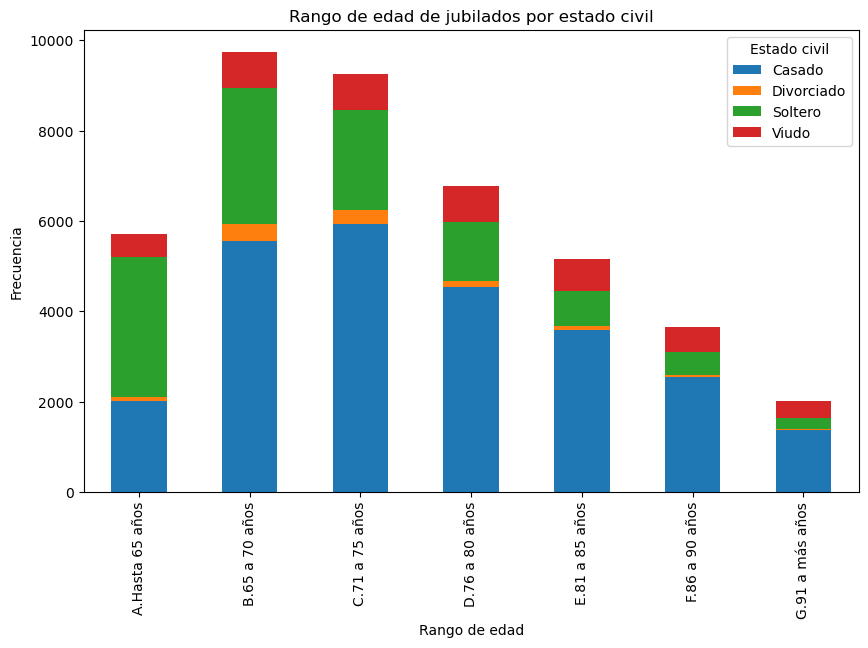

In [60]:
ax = BD_SNP_2022_4T_aggredadpen.plot(kind='bar', x="redadpen", stacked=True, figsize=(10, 6))
plt.title('Rango de edad de jubilados por estado civil')
plt.xlabel('Rango de edad')
plt.ylabel('Frecuencia')
plt.legend(title='Estado civil', loc='upper right')
'''
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom')
'''
plt.show()

### Referencias

- [Plataforma Nacional de Datos Abiertos](https://www.datosabiertos.gob.pe/SEARCH/type/dataset?query=Pensionistas+y+beneficiarios+&sort_by=changed&sort_order=DESC)
- [Sistema de informacion regional para la toma de decisiones](https://systems.inei.gob.pe/SIRTOD/app/consulta)
- [Metodologia de calculo del indice de precios al consumidor](https://www.inei.gob.pe/media/MenuRecursivo/publicaciones_digitales/Est/Lib0509/Libro.pdf)
- [Reporte de inflacion Diciembre 2023](https://www.bcrp.gob.pe/docs/Publicaciones/Reporte-Inflacion/2023/diciembre/reporte-de-inflacion-diciembre-2023.pdf)
- [BBVA Asset Managment](https://www.bbvaassetmanagement.com/es/actualidad/como-se-mide-la-inflacion-el-ipc/#:~:text=El%20%C3%ADndice%20se%20calcula%20dividiendo,IPC%20siempre%20asciende%20a%20100.)
- [Guia Metodologica BCRP](https://www.bcrp.gob.pe/docs/Publicaciones/Guia-Metodologica/Guia-Metodologica-06.pdf)
- [Producto bruto interno por departamentos](https://m.inei.gob.pe/estadisticas/indice-tematico/producto-bruto-interno-por-departamentos-9089/)
- [SBS Jubilacion anticipada](https://www.sbs.gob.pe/usuarios/informacion-de-pensiones/pensiones-y-beneficios/jubilacion-anticipada/jubilacion-anticipada-ordinaria)
- [Banco mundial Reporte de pobreza](https://www.bancomundial.org/es/news/press-release/2023/04/26/peru-informe-pobreza-y-equidad-resurgir-fortalecidos)
- [Limites pobreza (referencia)](https://larepublica.pe/economia/2023/04/24/cuando-una-persona-es-considerada-pobre-y-pobre-extrema-en-el-peru-atmp-1913520)

##### Pendientes por investigar

- Cual es el segmento con mayor impacto en la devalucion de su pension
- Tabla frecuencia de N° pensionistas por departamento
- Tabla de frecuencias de por rango de pension y departamento
- Histograma de pensiones
- Establecer ¿Porque Arequipa fue tan afectada por la inflacion en sus pensionistas
- Como incremento la inflacion el incremento de los precios del combustible producto de la guerra en ucrania.
- Cuales fueron las medidas del gobierno y el BCRP que pudieron incrementar la inflacion y porque el delay en el efecto de estas medidas.